<a href="https://colab.research.google.com/github/a01085034-commits/Modelos-de-regresi-n-lineal/blob/main/Proyecto_Final_Modelos_ARMA_Equipo_9_Capital_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Modelos ARMA x Equipo - Capital Analyst**

**Equipo 9:**

Otto Andrés Pérez Ortega	A01085034

Cecia Mariana Matagarza Betancourt	A01452052

Evelyn Lizbeth Trejo Rodríguez	A01452045

# **Google (GOOGL)**

Pruebas integrales de randon walk, raiz unitaria, modelado ARMA, ARIMA pronostico y análisis de cointegración.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

# Download GOOGL data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading GOOGL data from Yahoo Finance...")
data = yf.download("GOOGL", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

data

[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Datetime,,,,,
2025-08-29 07:30:00-06:00,212.220001,212.419998,210.240005,210.550003,9369713
2025-08-29 08:30:00-06:00,211.759995,212.250000,211.080002,212.230698,3227299
2025-08-29 09:30:00-06:00,211.949997,212.089996,211.289993,211.761993,1906214
2025-08-29 10:30:00-06:00,211.619995,212.350006,211.395004,211.960007,2005322
2025-08-29 11:30:00-06:00,213.654999,214.645004,211.449997,211.619995,7028424
...,...,...,...,...,...
2025-10-31 09:30:00-06:00,278.825012,281.609985,278.295013,280.864990,2747801
2025-10-31 10:30:00-06:00,279.799988,280.730011,278.730011,278.799988,1658928


In [ ]:
googl_diff

Ticker,GOOGL
Datetime,
2025-08-29 08:30:00-06:00,-0.460007
2025-08-29 09:30:00-06:00,0.190002
2025-08-29 10:30:00-06:00,-0.330002
2025-08-29 11:30:00-06:00,2.035004
2025-08-29 12:30:00-06:00,-0.494995
...,...
2025-10-31 09:30:00-06:00,-2.004974
2025-10-31 10:30:00-06:00,0.974976
2025-10-31 11:30:00-06:00,0.430023


[*********************100%***********************]  1 of 1 completed


Data successfully downloaded!
Total data points: 315
Date range: 2025-08-29 07:30:00-06:00 to 2025-10-31 13:30:00-06:00
Timezone: America/Mexico_City

Unit Root Tests for GOOGL Original Prices

📊 ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -1.3570
   p-value: 0.6027

   Interpretation:
   ✗ p-value >= 0.05: GOOGL Original Prices may be NON-STATIONARY

📊 KPSS Test:
   KPSS Statistic: 1.5871
   p-value: 0.0100

   Interpretation:
   ✗ p-value < 0.05: GOOGL Original Prices is NON-STATIONARY

Unit Root Tests for GOOGL Returns



📊 ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -17.6103
   p-value: 0.0000

   Interpretation:
   ✓ p-value < 0.05: GOOGL Returns is STATIONARY

📊 KPSS Test:
   KPSS Statistic: 0.1513
   p-value: 0.1000

   Interpretation:
   ✓ p-value >= 0.05: GOOGL Returns may be STATIONARY

ANALYZING CORRELOGRAMS


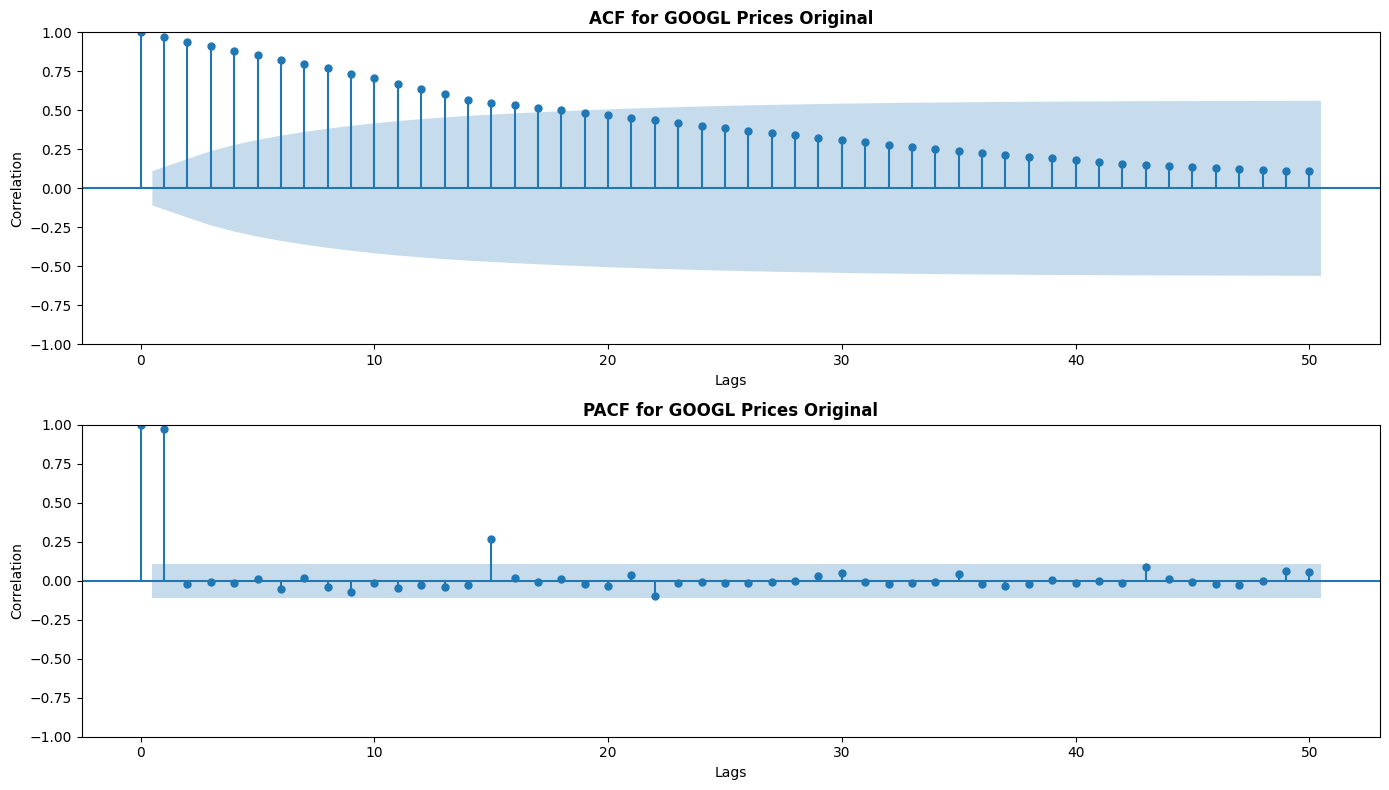


Correlogram Interpretation for GOOGL Prices Original:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

Unit Root Tests for GOOGL Differenced

📊 ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -17.7109
   p-value: 0.0000

   Interpretation:
   ✓ p-value < 0.05: GOOGL Differenced is STATIONARY

📊 KPSS Test:
   KPSS Statistic: 0.1456
   p-value: 0.1000

   Interpretation:
   ✓ p-value >= 0.05: GOOGL Differenced may be STATIONARY


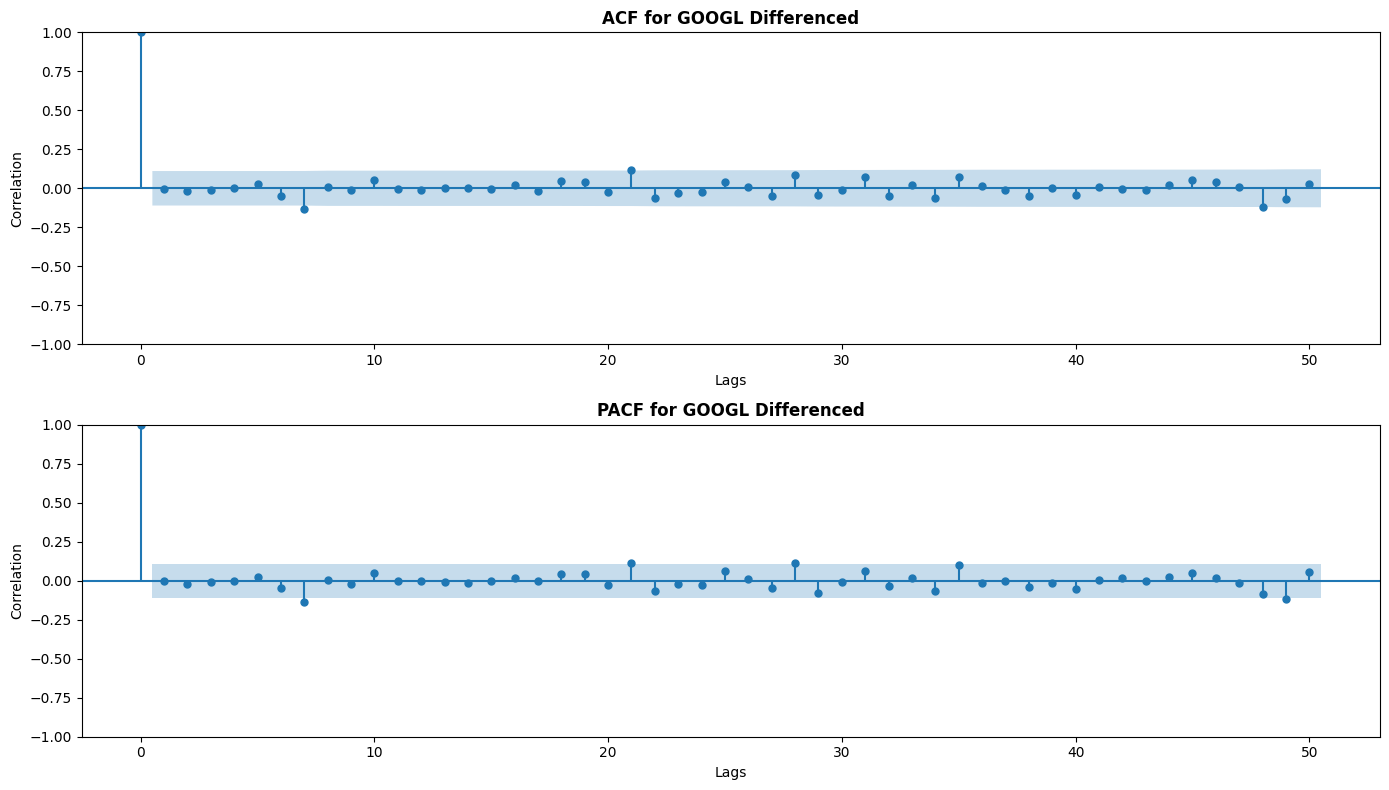


Correlogram Interpretation for GOOGL Differenced:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

ARMA

Best ARMA model for GOOGL:
Order: (3, 0, 2)
AIC: 1319.12
                               SARIMAX Results                                
Dep. Variable:                  GOOGL   No. Observations:                  315
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -652.560
Date:                Sat, 01 Nov 2025   AIC                           1319.120
Time:                        18:51:57   BIC                           1345.388
Sample:                             0   HQIC                          1329.615
                                - 315     

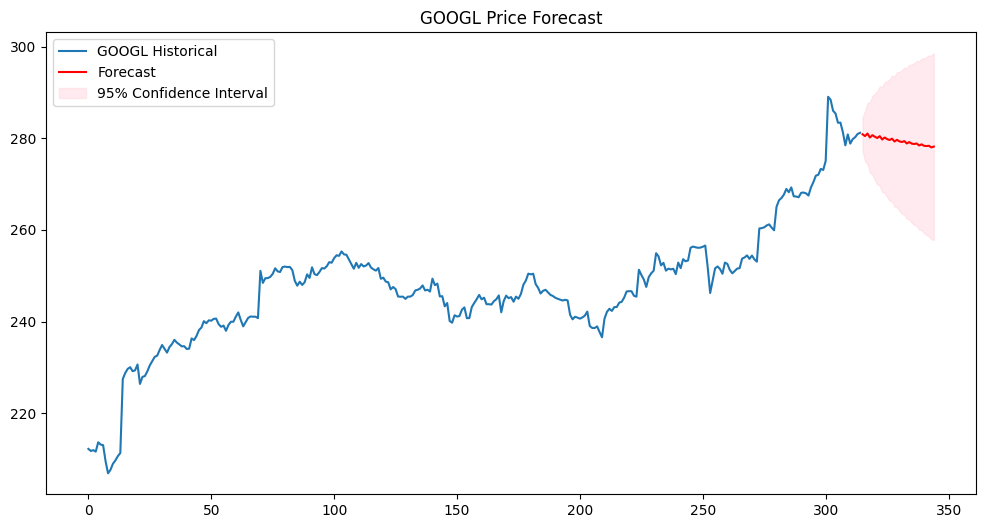


GOOGL Forecast Values (next 5 periods):
315    280.852618
316    280.468888
317    281.026759
318    280.153322
319    280.665696
Name: predicted_mean, dtype: float64

Forecast Interpretation for GOOGL:
Last observed value: 281.18
Average forecast value: 279.42
Forecast change: -1.76
Trend: Downward forecast trend
95% CI range at period 30: [257.83, 298.53]
Interpretation: The wider the confidence interval, the less certain the forecast

ARIMA

Best ARIMA model for GOOGL:
Order: (2, 2, 3)
AIC: 1306.46
INTERPRETATION:
  - p=2: 2 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=3: 3 moving average term(s)
                               SARIMAX Results                                
Dep. Variable:                  GOOGL   No. Observations:                  315
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -647.230
Date:                Sat, 01 Nov 2025   AIC                           1306.461
Time:                        18:52:16   BIC

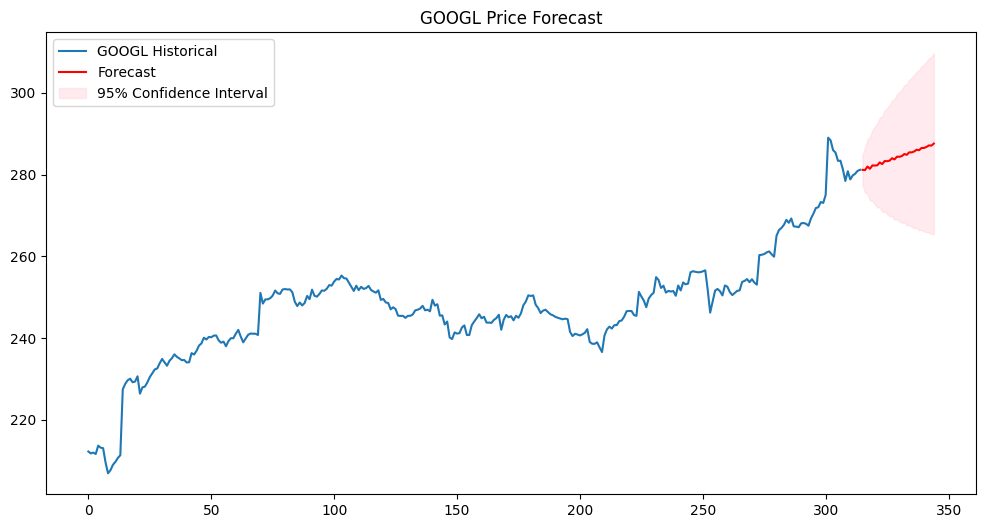


GOOGL Forecast Values (next 5 periods):
315    281.173141
316    281.116040
317    281.975871
318    281.434882
319    282.255192
Name: predicted_mean, dtype: float64

Forecast Interpretation for GOOGL:
Last observed value: 281.18
Average forecast value: 284.31
Forecast change: 3.13
Trend: Upward forecast trend
95% CI range at period 30: [265.49, 309.71]
Interpretation: The wider the confidence interval, the less certain the forecast


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Download GOOGL data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading GOOGL data from Yahoo Finance...")
data = yf.download("GOOGL", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

# Extract adjusted close prices
googl_close = data['Close'].dropna()

print(f"Data successfully downloaded!")
print(f"Total data points: {len(googl_close)}")
print(f"Date range: {googl_close.index[0]} to {googl_close.index[-1]}")
print(f"Timezone: {googl_close.index.tz}")


# Calculate returns for better stationarity
googl_returns = googl_close.pct_change().dropna() * 100  # Returns in percentage

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\n{'='*60}")
    print(f"Unit Root Tests for {name}")
    print('='*60)

    # ADF Test
    adf_result = adfuller(series)
    print("\n📊 ADF Test (Augmented Dickey-Fuller):")
    print(f'   ADF Statistic: {adf_result[0]:.4f}')
    print(f'   p-value: {adf_result[1]:.4f}')
    print("\n   Interpretation:")
    if adf_result[1] < 0.05:
        print(f"   ✓ p-value < 0.05: {name} is STATIONARY")
    else:
        print(f"   ✗ p-value >= 0.05: {name} may be NON-STATIONARY")

    # KPSS Test
    kpss_result = kpss(series)
    print("\n📊 KPSS Test:")
    print(f'   KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'   p-value: {kpss_result[1]:.4f}')
    print("\n   Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"   ✗ p-value < 0.05: {name} is NON-STATIONARY")
    else:
        print(f"   ✓ p-value >= 0.05: {name} may be STATIONARY")

# Perform unit root tests
unit_root_tests(googl_close, "GOOGL Original Prices")
unit_root_tests(googl_returns, "GOOGL Returns")

# Function to plot correlograms
def plot_correlograms(series, name, lags=50):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.tight_layout()
    plt.show()

    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

# Plot correlograms
print("\n" + "="*60)
print("ANALYZING CORRELOGRAMS")
print("="*60)
plot_correlograms(googl_close, "GOOGL Prices Original")

# Difference the series
googl_diff = googl_close.diff().dropna()
unit_root_tests(googl_diff, "GOOGL Differenced")
plot_correlograms(googl_diff, "GOOGL Differenced")

# Function to find best ARMA model
def best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Function to find best ARIMA model
def best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("INTERPRETATION:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order


# Plot detailed forecast with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = model.forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Print forecast values
    print(f"\n{name} Forecast Values (next 5 periods):")
    print(forecast[:5])

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")
    print("Interpretation: The wider the confidence interval, the less certain the forecast")


googl_close = data["Close"]["GOOGL"].reset_index(drop=True).dropna()

print(f"\n{'='*60}")
print(f"ARMA")
print('='*60)

#ARMA
forecast_steps = 30

googl_arma_model = best_arma(googl_close, "GOOGL")
print(googl_arma_model.summary())

plot_forecast(googl_arma_model, googl_close, "GOOGL")

print(f"\n{'='*60}")
print(f"ARIMA")
print('='*60)

#ARIMA
googl_order = best_arima(googl_close, "GOOGL")

googl_arima_model = ARIMA(googl_close, order=googl_order).fit()
print(googl_arima_model.summary())

last_index = len(googl_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

plot_forecast(googl_arima_model, googl_close, "GOOGL")






# **Apple (AAPL)**

Pruebas integrales de randon walk, raiz unitaria, modelado ARMA, ARIMA pronostico y análisis de cointegración.

In [ ]:
# Import yfinance (required before using yf.download)
import yfinance as yf

# Download AAPL data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading AAPL data from Yahoo Finance...")
data = yf.download("AAPL", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

data

[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-08-29 07:30:00-06:00,232.809601,233.361298,231.369995,232.559998,8795007
2025-08-29 08:30:00-06:00,232.960007,233.160004,232.500000,232.804993,3599986
2025-08-29 09:30:00-06:00,232.500000,233.029999,231.399994,232.985001,4414822
2025-08-29 10:30:00-06:00,232.029999,232.960007,231.979996,232.509995,2677553
2025-08-29 11:30:00-06:00,232.179993,232.574997,231.970001,232.032501,3415896
...,...,...,...,...,...
2025-10-31 09:30:00-06:00,272.434998,272.858490,270.220001,271.299896,4301242
2025-10-31 10:30:00-06:00,270.348785,273.170013,270.149994,272.429993,4005527


[*********************100%***********************]  1 of 1 completed


Data successfully downloaded!
Total data points: 315
Date range: 2025-08-29 07:30:00-06:00 to 2025-10-31 13:30:00-06:00
Timezone: America/Mexico_City

Unit Root Tests for AAPL Original Prices

📊 ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -0.8015
   p-value: 0.8187

   Interpretation:
   ✗ p-value >= 0.05: AAPL Original Prices may be NON-STATIONARY

📊 KPSS Test:
   KPSS Statistic: 2.0912
   p-value: 0.0100

   Interpretation:
   ✗ p-value < 0.05: AAPL Original Prices is NON-STATIONARY

Unit Root Tests for AAPL Returns



📊 ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -16.4011
   p-value: 0.0000

   Interpretation:
   ✓ p-value < 0.05: AAPL Returns is STATIONARY

📊 KPSS Test:
   KPSS Statistic: 0.0543
   p-value: 0.1000

   Interpretation:
   ✓ p-value >= 0.05: AAPL Returns may be STATIONARY

ANALYZING CORRELOGRAMS


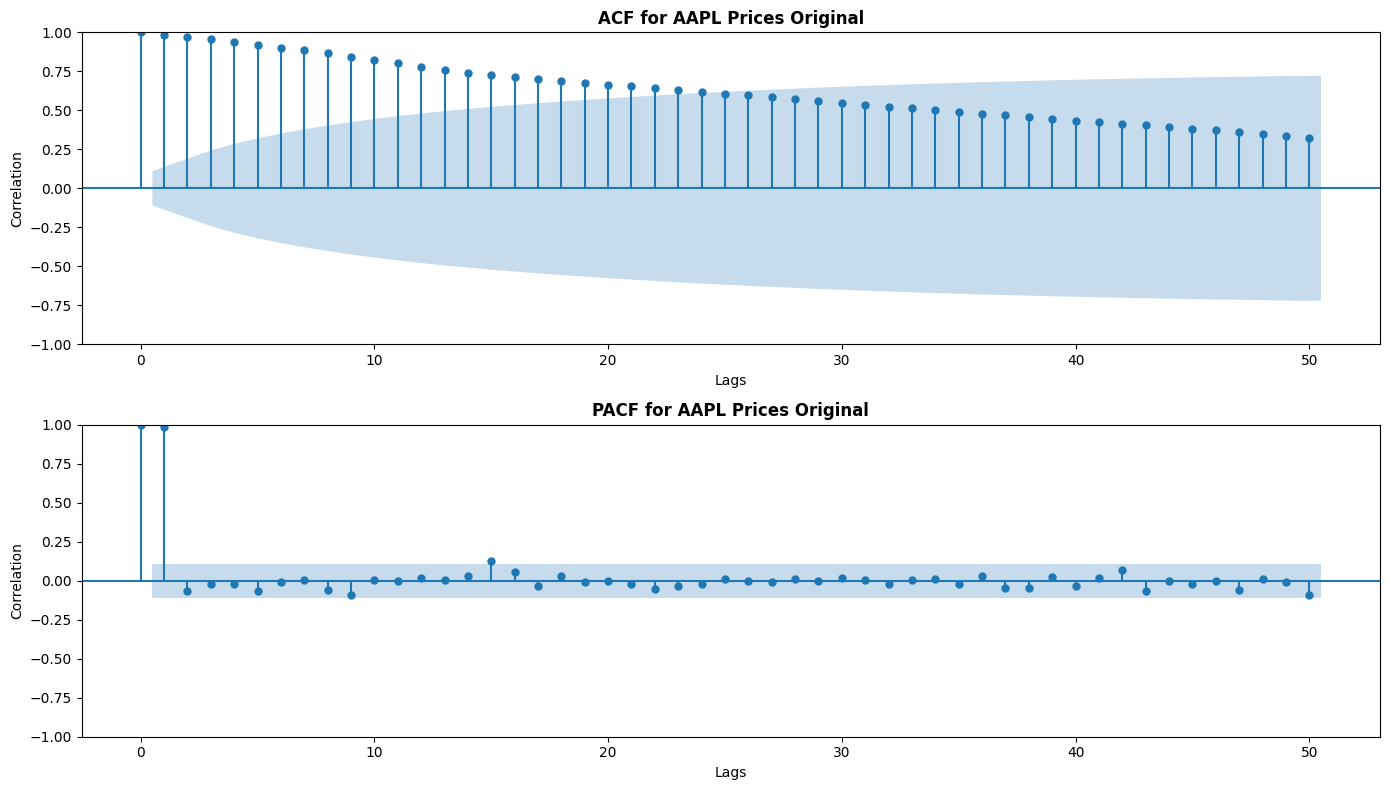


Correlogram Interpretation for AAPL Prices Original:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

Unit Root Tests for AAPL Differenced

📊 ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -16.4359
   p-value: 0.0000

   Interpretation:
   ✓ p-value < 0.05: AAPL Differenced is STATIONARY

📊 KPSS Test:
   KPSS Statistic: 0.0563
   p-value: 0.1000

   Interpretation:
   ✓ p-value >= 0.05: AAPL Differenced may be STATIONARY


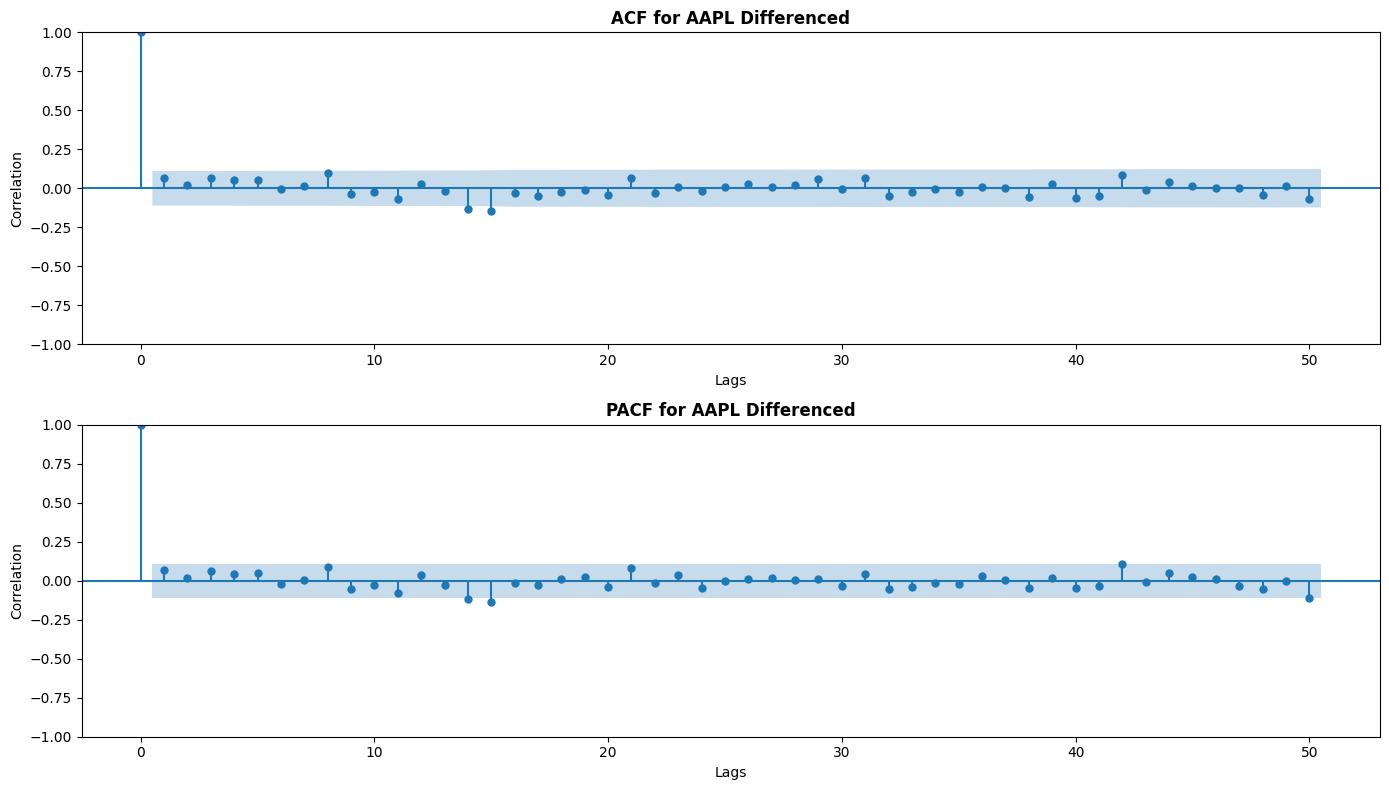


Correlogram Interpretation for AAPL Differenced:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

ARMA

Best ARMA model for AAPL:
Order: (3, 0, 3)
AIC: 1077.23
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  315
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -530.613
Date:                Sat, 01 Nov 2025   AIC                           1077.226
Time:                        18:52:26   BIC                           1107.247
Sample:                             0   HQIC                          1089.220
                                - 315       

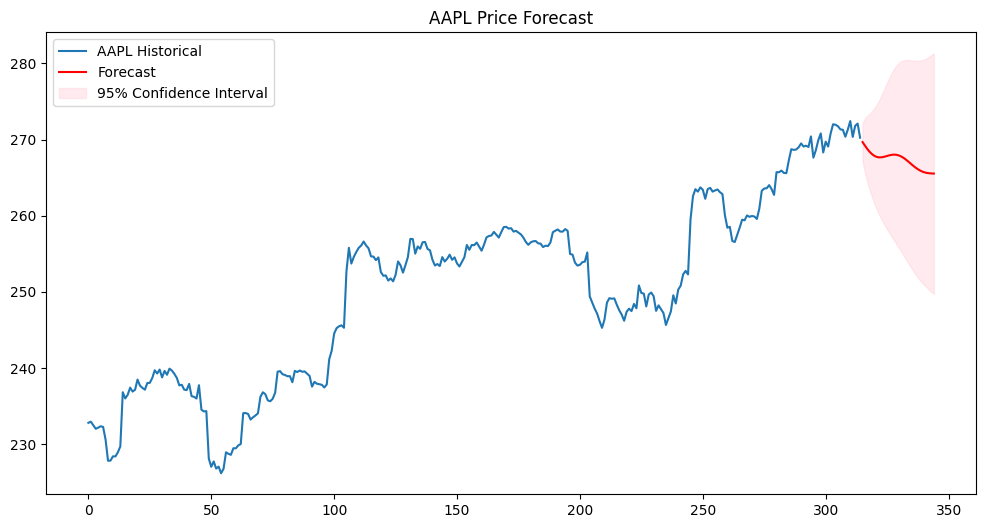


AAPL Forecast Values (next 5 periods):
315    269.675475
316    269.196438
317    268.747263
318    268.357298
319    268.047605
Name: predicted_mean, dtype: float64

Forecast Interpretation for AAPL:
Last observed value: 270.25
Average forecast value: 267.31
Forecast change: -2.94
Trend: Downward forecast trend
95% CI range at period 30: [249.75, 281.34]
Interpretation: The wider the confidence interval, the less certain the forecast

ARIMA

Best ARIMA model for AAPL:
Order: (2, 1, 3)
AIC: 1065.78
INTERPRETATION:
  - p=2: 2 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=3: 3 moving average term(s)
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  315
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -526.888
Date:                Sat, 01 Nov 2025   AIC                           1065.775
Time:                        18:52:45   BIC   

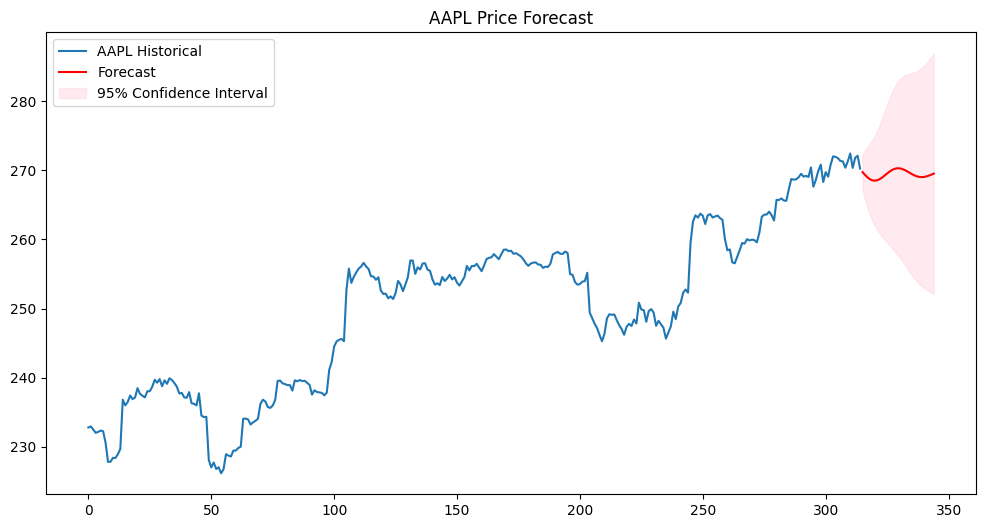


AAPL Forecast Values (next 5 periods):
315    269.736556
316    269.333642
317    268.980765
318    268.711306
319    268.547659
Name: predicted_mean, dtype: float64

Forecast Interpretation for AAPL:
Last observed value: 270.25
Average forecast value: 269.39
Forecast change: -0.86
Trend: Downward forecast trend
95% CI range at period 30: [252.13, 286.92]
Interpretation: The wider the confidence interval, the less certain the forecast


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Download AAPL data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading AAPL data from Yahoo Finance...")
data = yf.download("AAPL", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

# Extract adjusted close prices
aapl_close = data['Close'].dropna()

print(f"Data successfully downloaded!")
print(f"Total data points: {len(aapl_close)}")
print(f"Date range: {aapl_close.index[0]} to {aapl_close.index[-1]}")
print(f"Timezone: {aapl_close.index.tz}")


# Calculate returns for better stationarity
aapl_returns = aapl_close.pct_change().dropna() * 100  # Returns in percentage

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\n{'='*60}")
    print(f"Unit Root Tests for {name}")
    print('='*60)

    # ADF Test
    adf_result = adfuller(series)
    print("\n📊 ADF Test (Augmented Dickey-Fuller):")
    print(f'   ADF Statistic: {adf_result[0]:.4f}')
    print(f'   p-value: {adf_result[1]:.4f}')
    print("\n   Interpretation:")
    if adf_result[1] < 0.05:
        print(f"   ✓ p-value < 0.05: {name} is STATIONARY")
    else:
        print(f"   ✗ p-value >= 0.05: {name} may be NON-STATIONARY")

    # KPSS Test
    kpss_result = kpss(series)
    print("\n📊 KPSS Test:")
    print(f'   KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'   p-value: {kpss_result[1]:.4f}')
    print("\n   Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"   ✗ p-value < 0.05: {name} is NON-STATIONARY")
    else:
        print(f"   ✓ p-value >= 0.05: {name} may be STATIONARY")

# Perform unit root tests
unit_root_tests(aapl_close, "AAPL Original Prices")
unit_root_tests(aapl_returns, "AAPL Returns")

# Function to plot correlograms
def plot_correlograms(series, name, lags=50):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.tight_layout()
    plt.show()

    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

# Plot correlograms
print("\n" + "="*60)
print("ANALYZING CORRELOGRAMS")
print("="*60)
plot_correlograms(aapl_close, "AAPL Prices Original")

# Difference the series
aapl_diff = aapl_close.diff().dropna()
unit_root_tests(aapl_diff, "AAPL Differenced")
plot_correlograms(aapl_diff, "AAPL Differenced")

# Function to find best ARMA model
def best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Function to find best ARIMA model
def best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("INTERPRETATION:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order


# Plot detailed forecast with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = model.forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Print forecast values
    print(f"\n{name} Forecast Values (next 5 periods):")
    print(forecast[:5])

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")
    print("Interpretation: The wider the confidence interval, the less certain the forecast")


aapl_close = data["Close"]["AAPL"].reset_index(drop=True).dropna()

print(f"\n{'='*60}")
print(f"ARMA")
print('='*60)

#ARMA
forecast_steps = 30

aapl_arma_model = best_arma(aapl_close, "AAPL")
print(aapl_arma_model.summary())

plot_forecast(aapl_arma_model, aapl_close, "AAPL")

print(f"\n{'='*60}")
print(f"ARIMA")
print('='*60)

#ARIMA
aapl_order = best_arima(aapl_close, "AAPL")

aapl_arima_model = ARIMA(aapl_close, order=aapl_order).fit()
print(aapl_arima_model.summary())

last_index = len(aapl_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

plot_forecast(aapl_arima_model, aapl_close, "AAPL")


# **Boeing Co (BA)**

Pruebas integrales de randon walk, raiz unitaria, modelado ARMA, ARIMA pronostico y analisis de cointegracion.

In [ ]:
# Import yfinance (required before using yf.download)
import yfinance as yf

# Download BA data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading BA data from Yahoo Finance...")
data = yf.download("BA", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

data

[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,BA,BA,BA,BA,BA
Datetime,,,,,
2025-08-29 07:30:00-06:00,234.899994,236.800003,233.169998,236.130005,999656
2025-08-29 08:30:00-06:00,236.800003,237.050003,234.000000,234.869995,872450
2025-08-29 09:30:00-06:00,237.360001,238.050003,236.449997,236.789993,750425
2025-08-29 10:30:00-06:00,236.210007,237.889999,236.059998,237.330002,480631
2025-08-29 11:30:00-06:00,236.330002,236.755005,236.050003,236.270004,353289
...,...,...,...,...,...
2025-10-31 09:30:00-06:00,200.440002,201.699997,200.029999,201.100006,867986
2025-10-31 10:30:00-06:00,200.085007,200.914993,199.679993,200.475006,994632


[*********************100%***********************]  1 of 1 completed



Data successfully downloaded!
Total data points: 315
Date range: 2025-08-29 07:30:00-06:00 to 2025-10-31 13:30:00-06:00
Timezone: America/Mexico_City

Unit Root Tests for BA Original Prices

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -1.6112
   p-value: 0.4773

   Interpretation:
   p-value >= 0.05: BA Original Prices may be NON-STATIONARY

KPSS Test:
   KPSS Statistic: 1.2596
   p-value: 0.0100

   Interpretation:
   p-value < 0.05: BA Original Prices is NON-STATIONARY

Unit Root Tests for BA Returns

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -18.2353
   p-value: 0.0000

   Interpretation:
   p-value < 0.05: BA Returns is STATIONARY

KPSS Test:
   KPSS Statistic: 0.0938
   p-value: 0.1000

   Interpretation:
   p-value >= 0.05: BA Returns may be STATIONARY

ANALYZING CORRELOGRAMS


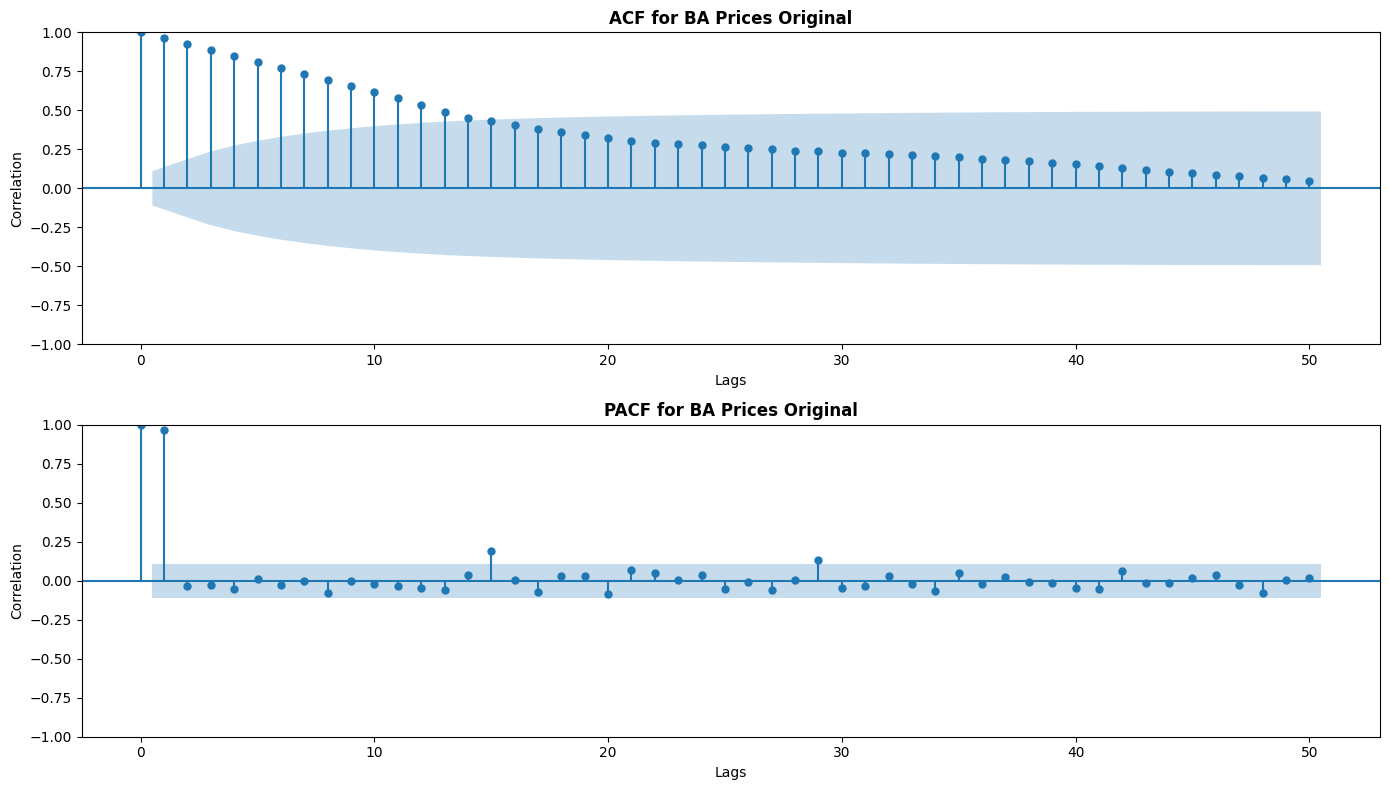


Correlogram Interpretation for BA Prices Original:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

Unit Root Tests for BA Differenced

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -18.2041
   p-value: 0.0000

   Interpretation:
   p-value < 0.05: BA Differenced is STATIONARY

KPSS Test:
   KPSS Statistic: 0.0913
   p-value: 0.1000

   Interpretation:
   p-value >= 0.05: BA Differenced may be STATIONARY


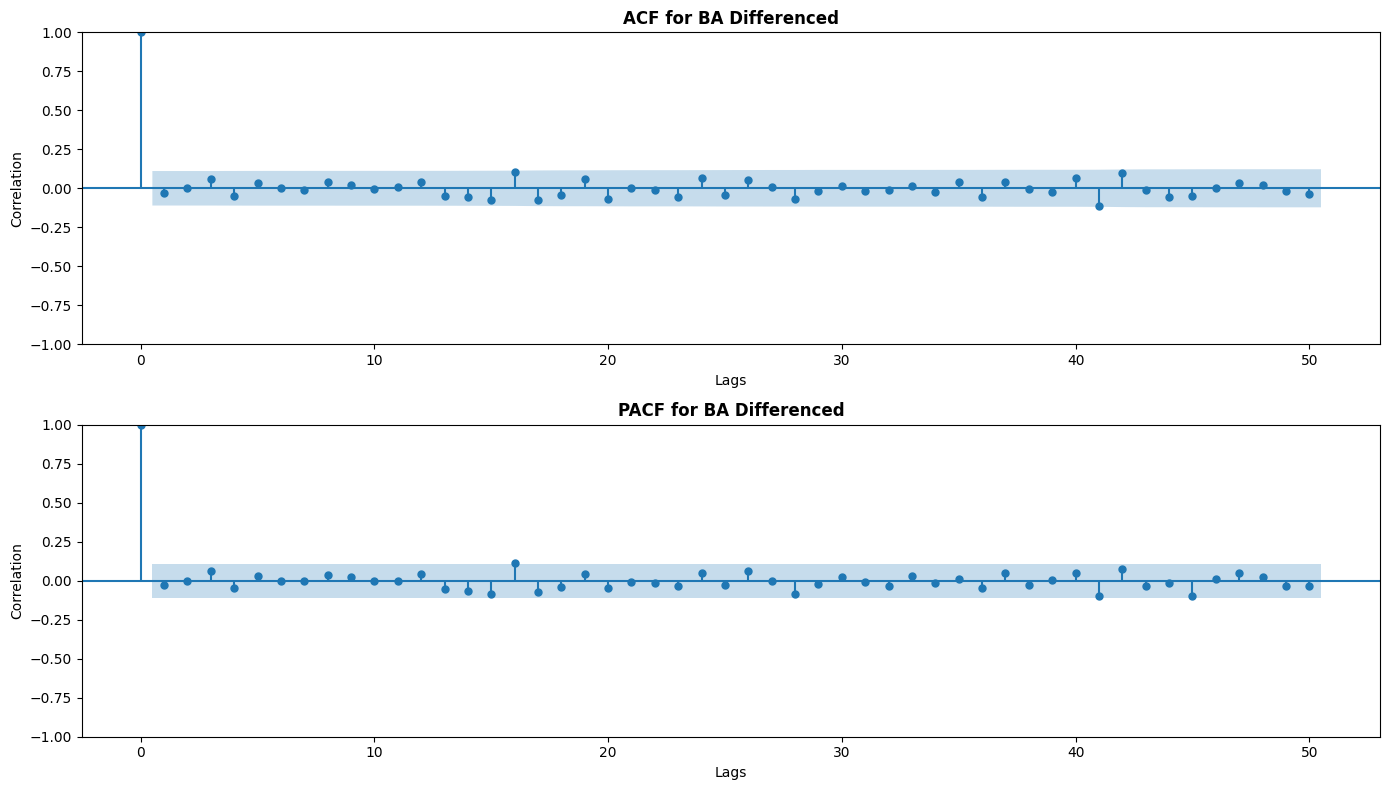


Correlogram Interpretation for BA Differenced:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

ARMA

Best ARMA model for BA:
Order: (1, 0, 0)
AIC: 1152.50
                               SARIMAX Results                                
Dep. Variable:                     BA   No. Observations:                  315
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -573.249
Date:                Sat, 01 Nov 2025   AIC                           1152.497
Time:                        18:52:54   BIC                           1163.755
Sample:                             0   HQIC                          1156.995
                                - 315           

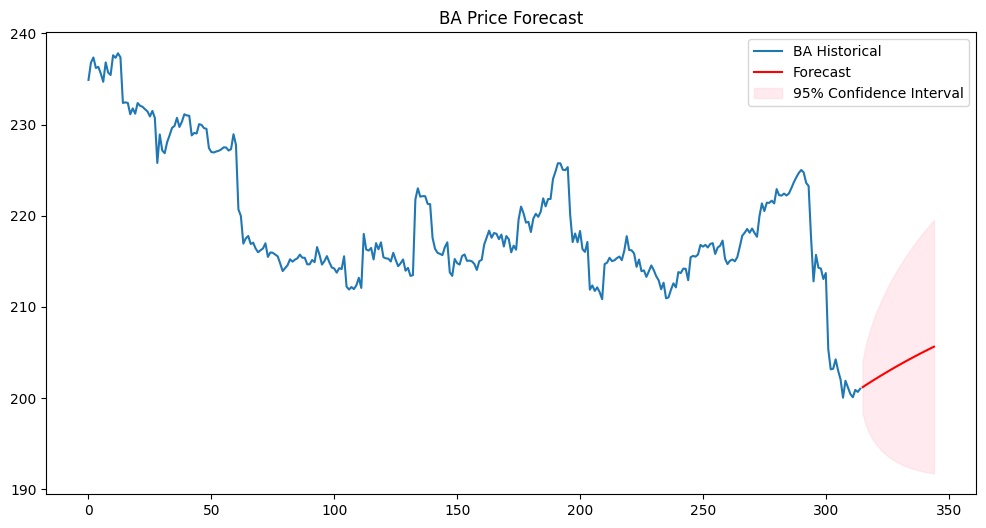


BA Forecast Values (next 5 periods):
315    201.196980
316    201.372198
317    201.545676
318    201.717430
319    201.887478
Name: predicted_mean, dtype: float64

Forecast Interpretation for BA:
Last observed value: 201.02
Average forecast value: 203.52
Forecast change: 2.50
Trend: Upward forecast trend
95% CI range at period 30: [191.75, 219.52]
Interpretation: The wider the confidence interval, the less certain the forecast

ARIMA

Best ARIMA model for BA:
Order: (2, 1, 2)
AIC: 1141.47
INTERPRETATION:
  - p=2: 2 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=2: 2 moving average term(s)
                               SARIMAX Results                                
Dep. Variable:                     BA   No. Observations:                  315
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -565.737
Date:                Sat, 01 Nov 2025   AIC                           1141.474
Time:                        18:53:11   BIC            

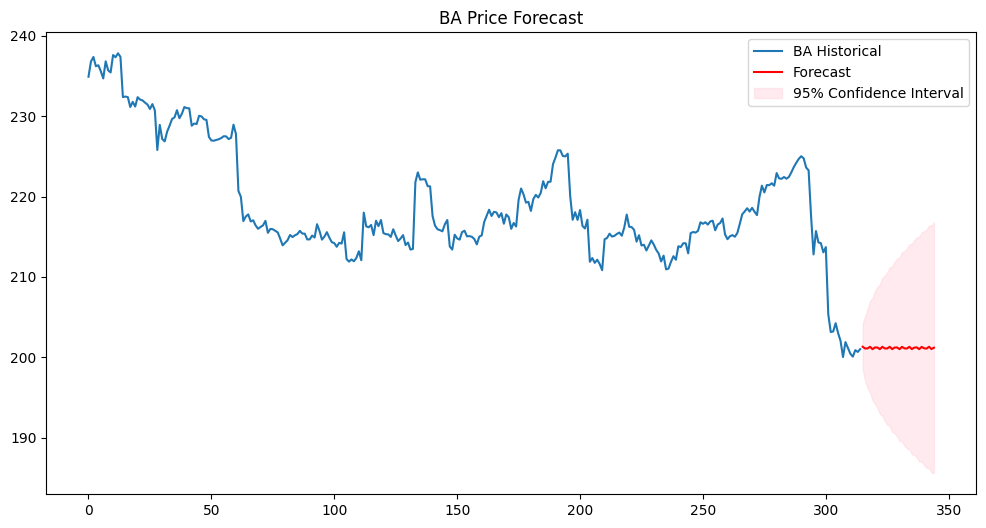


BA Forecast Values (next 5 periods):
315    201.315476
316    201.094724
317    201.109412
318    201.309014
319    201.014601
Name: predicted_mean, dtype: float64

Forecast Interpretation for BA:
Last observed value: 201.02
Average forecast value: 201.17
Forecast change: 0.15
Trend: Upward forecast trend
95% CI range at period 30: [185.58, 216.82]
Interpretation: The wider the confidence interval, the less certain the forecast


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Download BA data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading BA data from Yahoo Finance...")
data = yf.download("BA", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

# Extract adjusted close prices
ba_close = data['Close'].dropna()

print(f"Data successfully downloaded!")
print(f"Total data points: {len(ba_close)}")
print(f"Date range: {ba_close.index[0]} to {ba_close.index[-1]}")
print(f"Timezone: {ba_close.index.tz}")


# Calculate returns for better stationarity
ba_returns = ba_close.pct_change().dropna() * 100  # Returns in percentage

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\n{'='*60}")
    print(f"Unit Root Tests for {name}")
    print('='*60)

    # ADF Test
    adf_result = adfuller(series)
    print("\nADF Test (Augmented Dickey-Fuller):")
    print(f'   ADF Statistic: {adf_result[0]:.4f}')
    print(f'   p-value: {adf_result[1]:.4f}')
    print("\n   Interpretation:")
    if adf_result[1] < 0.05:
        print(f"   p-value < 0.05: {name} is STATIONARY")
    else:
        print(f"   p-value >= 0.05: {name} may be NON-STATIONARY")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'   KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'   p-value: {kpss_result[1]:.4f}')
    print("\n   Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"   p-value < 0.05: {name} is NON-STATIONARY")
    else:
        print(f"   p-value >= 0.05: {name} may be STATIONARY")

# Perform unit root tests
unit_root_tests(ba_close, "BA Original Prices")
unit_root_tests(ba_returns, "BA Returns")

# Function to plot correlograms
def plot_correlograms(series, name, lags=50):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.tight_layout()
    plt.show()

    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

# Plot correlograms
print("\n" + "="*60)
print("ANALYZING CORRELOGRAMS")
print("="*60)
plot_correlograms(ba_close, "BA Prices Original")

# Difference the series
ba_diff = ba_close.diff().dropna()
unit_root_tests(ba_diff, "BA Differenced")
plot_correlograms(ba_diff, "BA Differenced")

# Function to find best ARMA model
def best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Function to find best ARIMA model
def best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("INTERPRETATION:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order


# Plot detailed forecast with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = model.forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Print forecast values
    print(f"\n{name} Forecast Values (next 5 periods):")
    print(forecast[:5])

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")
    print("Interpretation: The wider the confidence interval, the less certain the forecast")


ba_close = data["Close"]["BA"].reset_index(drop=True).dropna()

print(f"\n{'='*60}")
print(f"ARMA")
print('='*60)

#ARMA
forecast_steps = 30

ba_arma_model = best_arma(ba_close, "BA")
print(ba_arma_model.summary())

plot_forecast(ba_arma_model, ba_close, "BA")

print(f"\n{'='*60}")
print(f"ARIMA")
print('='*60)

#ARIMA
ba_order = best_arima(ba_close, "BA")

ba_arima_model = ARIMA(ba_close, order=ba_order).fit()
print(ba_arima_model.summary())

last_index = len(ba_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

plot_forecast(ba_arima_model, ba_close, "BA")

# **Chevron Corp (CVX)**

Pruebas integrales de randon walk, raiz unitaria, modelado ARMA, ARIMA pronostico y análisis de cointegración.

In [ ]:
# Import yfinance (required before using yf.download)
import yfinance as yf

# Download BA data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading CVX data from Yahoo Finance...")
data = yf.download("CVX", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CVX,CVX,CVX,CVX,CVX
Datetime,,,,,
2025-08-29 07:30:00-06:00,160.000000,160.990005,159.449997,159.699997,1654659
2025-08-29 08:30:00-06:00,160.369995,160.690002,159.850006,160.020004,614259
2025-08-29 09:30:00-06:00,160.360001,160.800003,160.289993,160.350006,344275
2025-08-29 10:30:00-06:00,160.779999,160.809998,160.319305,160.347198,310285
2025-08-29 11:30:00-06:00,160.800003,161.100006,160.649994,160.800003,501958
...,...,...,...,...,...
2025-10-31 09:30:00-06:00,157.470001,158.679993,156.520004,158.369995,1013807
2025-10-31 10:30:00-06:00,158.585007,158.750000,157.029999,157.490005,672830


[*********************100%***********************]  1 of 1 completed


Data successfully downloaded!
Total data points: 315
Date range: 2025-08-29 07:30:00-06:00 to 2025-10-31 13:30:00-06:00
Timezone: America/Mexico_City

Unit Root Tests for CVX Original Prices

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -2.4766
   p-value: 0.1213

   Interpretation:
   p-value >= 0.05: CVX Original Prices may be NON-STATIONARY

KPSS Test:
   KPSS Statistic: 1.1937
   p-value: 0.0100

   Interpretation:
   p-value < 0.05: CVX Original Prices is NON-STATIONARY

Unit Root Tests for CVX Returns

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -6.1405
   p-value: 0.0000

   Interpretation:
   p-value < 0.05: CVX Returns is STATIONARY

KPSS Test:
   KPSS Statistic: 0.1030
   p-value: 0.1000

   Interpretation:
   p-value >= 0.05: CVX Returns may be STATIONARY

ANALYZING CORRELOGRAMS


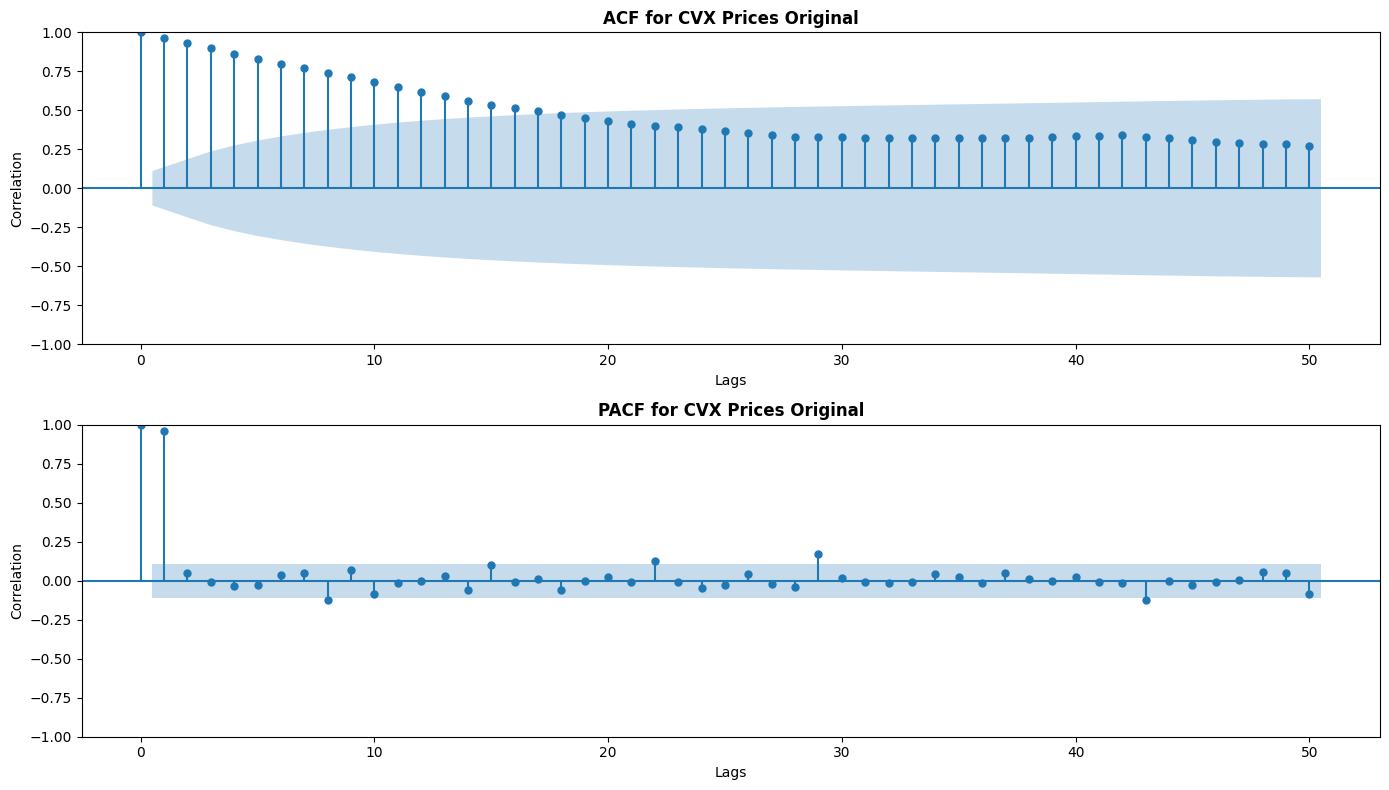


Correlogram Interpretation for CVX Prices Original:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

Unit Root Tests for CVX Differenced

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -6.1435
   p-value: 0.0000

   Interpretation:
   p-value < 0.05: CVX Differenced is STATIONARY

KPSS Test:
   KPSS Statistic: 0.1033
   p-value: 0.1000

   Interpretation:
   p-value >= 0.05: CVX Differenced may be STATIONARY


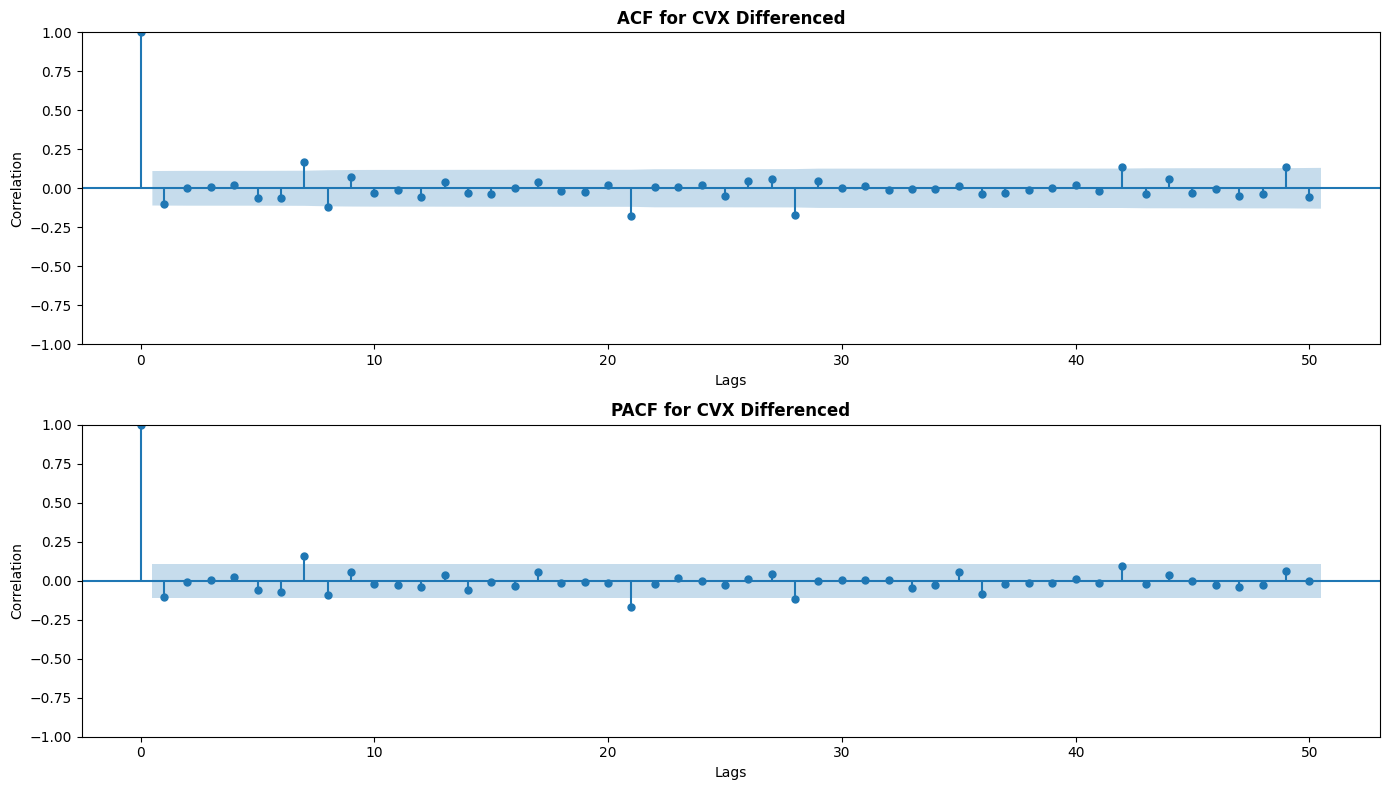


Correlogram Interpretation for CVX Differenced:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

ARMA

Best ARMA model for CVX:
Order: (3, 0, 3)
AIC: 700.10
                               SARIMAX Results                                
Dep. Variable:                    CVX   No. Observations:                  315
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -342.050
Date:                Sat, 01 Nov 2025   AIC                            700.101
Time:                        18:53:21   BIC                            730.122
Sample:                             0   HQIC                           712.095
                                - 315          

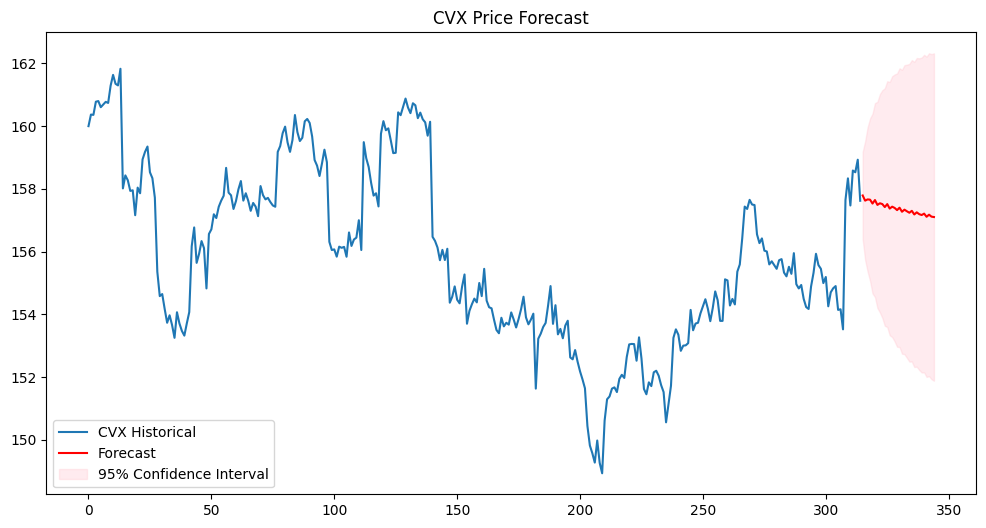


CVX Forecast Values (next 5 periods):
315    157.789507
316    157.625098
317    157.663803
318    157.656329
319    157.532053
Name: predicted_mean, dtype: float64

Forecast Interpretation for CVX:
Last observed value: 157.62
Average forecast value: 157.37
Forecast change: -0.25
Trend: Downward forecast trend
95% CI range at period 30: [151.88, 162.32]
Interpretation: The wider the confidence interval, the less certain the forecast

ARIMA

Best ARIMA model for CVX:
Order: (2, 1, 3)
AIC: 695.58
INTERPRETATION:
  - p=2: 2 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=3: 3 moving average term(s)
                               SARIMAX Results                                
Dep. Variable:                    CVX   No. Observations:                  315
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -341.788
Date:                Sat, 01 Nov 2025   AIC                            695.575
Time:                        18:53:43   BIC       

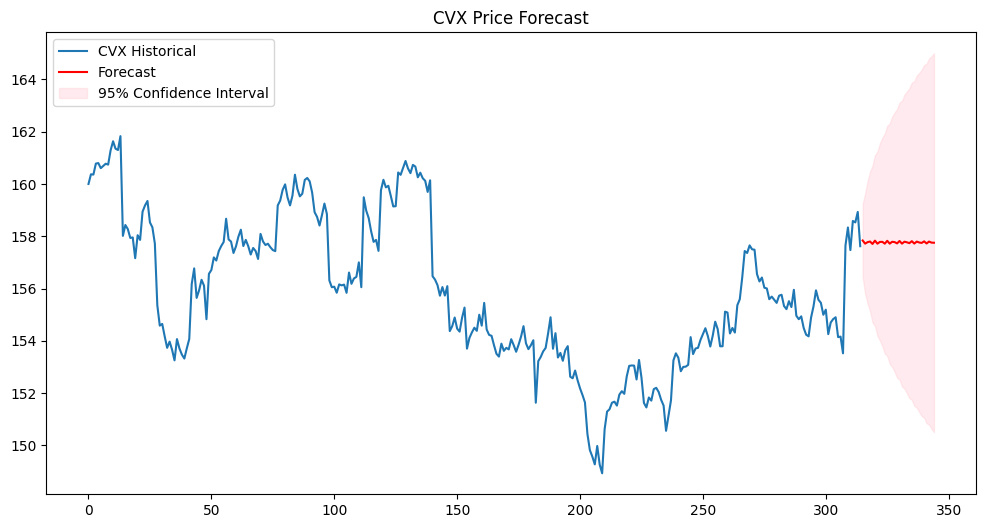


CVX Forecast Values (next 5 periods):
315    157.837614
316    157.717406
317    157.773915
318    157.797704
319    157.705170
Name: predicted_mean, dtype: float64

Forecast Interpretation for CVX:
Last observed value: 157.62
Average forecast value: 157.77
Forecast change: 0.15
Trend: Upward forecast trend
95% CI range at period 30: [150.50, 165.00]
Interpretation: The wider the confidence interval, the less certain the forecast


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Download CVX data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading CVX data from Yahoo Finance...")
data = yf.download("CVX", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

# Extract adjusted close prices
cvx_close = data['Close'].dropna()

print(f"Data successfully downloaded!")
print(f"Total data points: {len(cvx_close)}")
print(f"Date range: {cvx_close.index[0]} to {cvx_close.index[-1]}")
print(f"Timezone: {cvx_close.index.tz}")


# Calculate returns for better stationarity
cvx_returns = cvx_close.pct_change().dropna() * 100  # Returns in percentage

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\n{'='*60}")
    print(f"Unit Root Tests for {name}")
    print('='*60)

    # ADF Test
    adf_result = adfuller(series)
    print("\nADF Test (Augmented Dickey-Fuller):")
    print(f'   ADF Statistic: {adf_result[0]:.4f}')
    print(f'   p-value: {adf_result[1]:.4f}')
    print("\n   Interpretation:")
    if adf_result[1] < 0.05:
        print(f"   p-value < 0.05: {name} is STATIONARY")
    else:
        print(f"   p-value >= 0.05: {name} may be NON-STATIONARY")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'   KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'   p-value: {kpss_result[1]:.4f}')
    print("\n   Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"   p-value < 0.05: {name} is NON-STATIONARY")
    else:
        print(f"   p-value >= 0.05: {name} may be STATIONARY")

# Perform unit root tests
unit_root_tests(cvx_close, "CVX Original Prices")
unit_root_tests(cvx_returns, "CVX Returns")

# Function to plot correlograms
def plot_correlograms(series, name, lags=50):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.tight_layout()
    plt.show()

    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

# Plot correlograms
print("\n" + "="*60)
print("ANALYZING CORRELOGRAMS")
print("="*60)
plot_correlograms(cvx_close, "CVX Prices Original")

# Difference the series
cvx_diff = cvx_close.diff().dropna()
unit_root_tests(cvx_diff, "CVX Differenced")
plot_correlograms(cvx_diff, "CVX Differenced")

# Function to find best ARMA model
def best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Function to find best ARIMA model
def best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("INTERPRETATION:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order


# Plot detailed forecast with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = model.forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Print forecast values
    print(f"\n{name} Forecast Values (next 5 periods):")
    print(forecast[:5])

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")
    print("Interpretation: The wider the confidence interval, the less certain the forecast")


cvx_close = data["Close"]["CVX"].reset_index(drop=True).dropna()

print(f"\n{'='*60}")
print(f"ARMA")
print('='*60)

#ARMA
forecast_steps = 30

cvx_arma_model = best_arma(cvx_close, "CVX")
print(cvx_arma_model.summary())

plot_forecast(cvx_arma_model, cvx_close, "CVX")

print(f"\n{'='*60}")
print(f"ARIMA")
print('='*60)

#ARIMA
cvx_order = best_arima(cvx_close, "CVX")

cvx_arima_model = ARIMA(cvx_close, order=cvx_order).fit()
print(cvx_arima_model.summary())

last_index = len(cvx_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

plot_forecast(cvx_arima_model, cvx_close, "CVX")

# **Mercado Libre (MELI)**

Pruebas integrales de randon walk, raiz unitaria, modelado ARMA, ARIMA pronostico y análisis de cointegración.

In [ ]:
# Import yfinance (required before using yf.download)
import yfinance as yf

# Download BA data from Yahoo Finance (60-minute intervals, 32 days)
print("\nDownloading MELI data from Yahoo Finance...")
data = yf.download("MELI", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MELI,MELI,MELI,MELI,MELI
Datetime,,,,,
2025-08-29 07:30:00-06:00,2471.790039,2503.239990,2466.385010,2484.000000,63416
2025-08-29 08:30:00-06:00,2455.000000,2479.919922,2455.000000,2479.919922,34039
2025-08-29 09:30:00-06:00,2467.981689,2469.195068,2455.000000,2455.000000,21560
2025-08-29 10:30:00-06:00,2455.675049,2468.379883,2453.370117,2468.379883,17674
2025-08-29 11:30:00-06:00,2451.129883,2458.919922,2446.300049,2454.489990,19303
...,...,...,...,...,...
2025-10-31 09:30:00-06:00,2337.000000,2353.760010,2332.909912,2339.000000,45808
2025-10-31 10:30:00-06:00,2318.370117,2346.908447,2310.000000,2342.254883,27389


[*********************100%***********************]  1 of 1 completed



Data successfully downloaded!
Total data points: 314
Date range: 2025-08-29 07:30:00-06:00 to 2025-10-31 13:30:00-06:00
Timezone: America/Mexico_City

Unit Root Tests for MELI Original Prices

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -1.6391
   p-value: 0.4627

   Interpretation:
   p-value >= 0.05: MELI Original Prices may be NON-STATIONARY

KPSS Test:
   KPSS Statistic: 1.3561
   p-value: 0.0100

   Interpretation:
   p-value < 0.05: MELI Original Prices is NON-STATIONARY

Unit Root Tests for MELI Returns

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -16.9581
   p-value: 0.0000

   Interpretation:
   p-value < 0.05: MELI Returns is STATIONARY

KPSS Test:
   KPSS Statistic: 0.1765
   p-value: 0.1000

   Interpretation:
   p-value >= 0.05: MELI Returns may be STATIONARY

ANALYZING CORRELOGRAMS


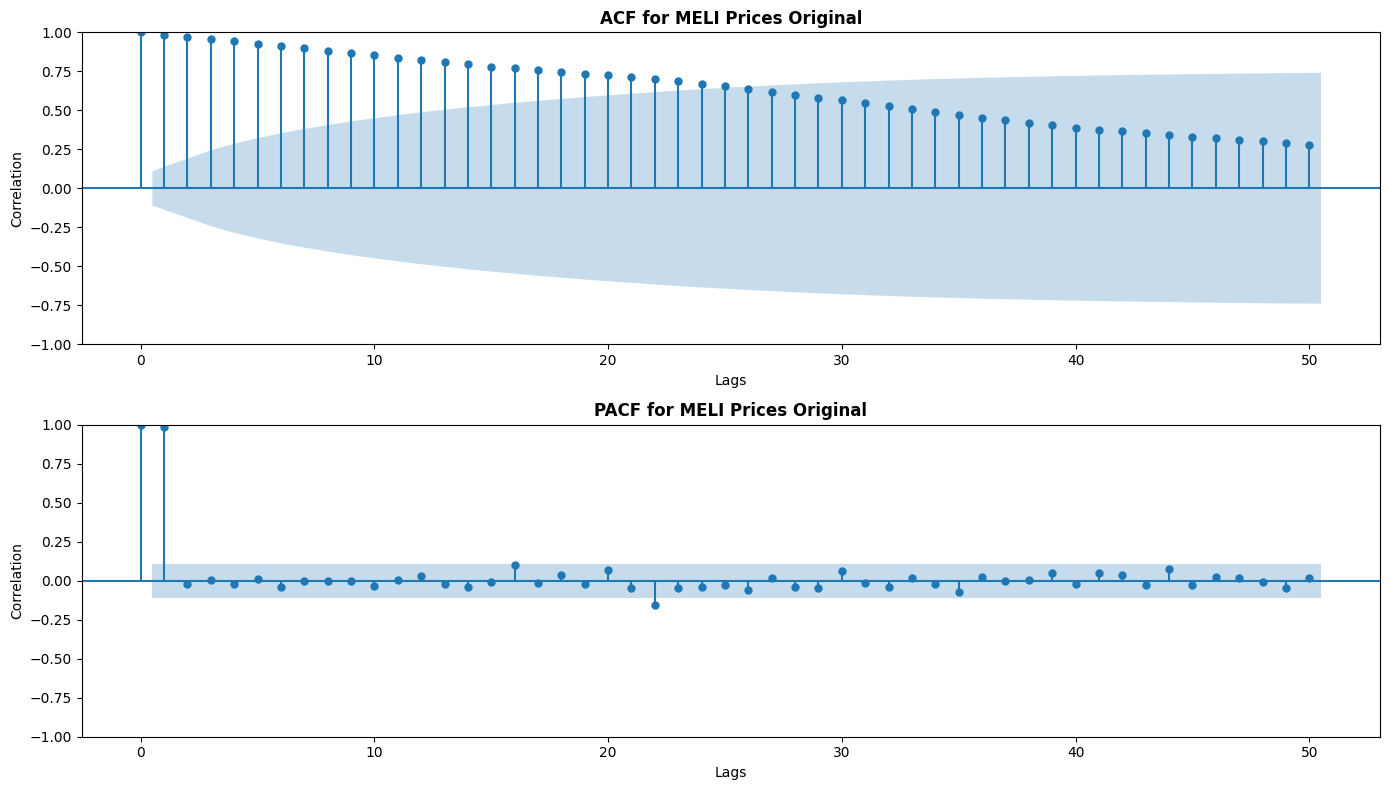


Correlogram Interpretation for MELI Prices Original:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

Unit Root Tests for MELI Differenced

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -16.9996
   p-value: 0.0000

   Interpretation:
   p-value < 0.05: MELI Differenced is STATIONARY

KPSS Test:
   KPSS Statistic: 0.1730
   p-value: 0.1000

   Interpretation:
   p-value >= 0.05: MELI Differenced may be STATIONARY


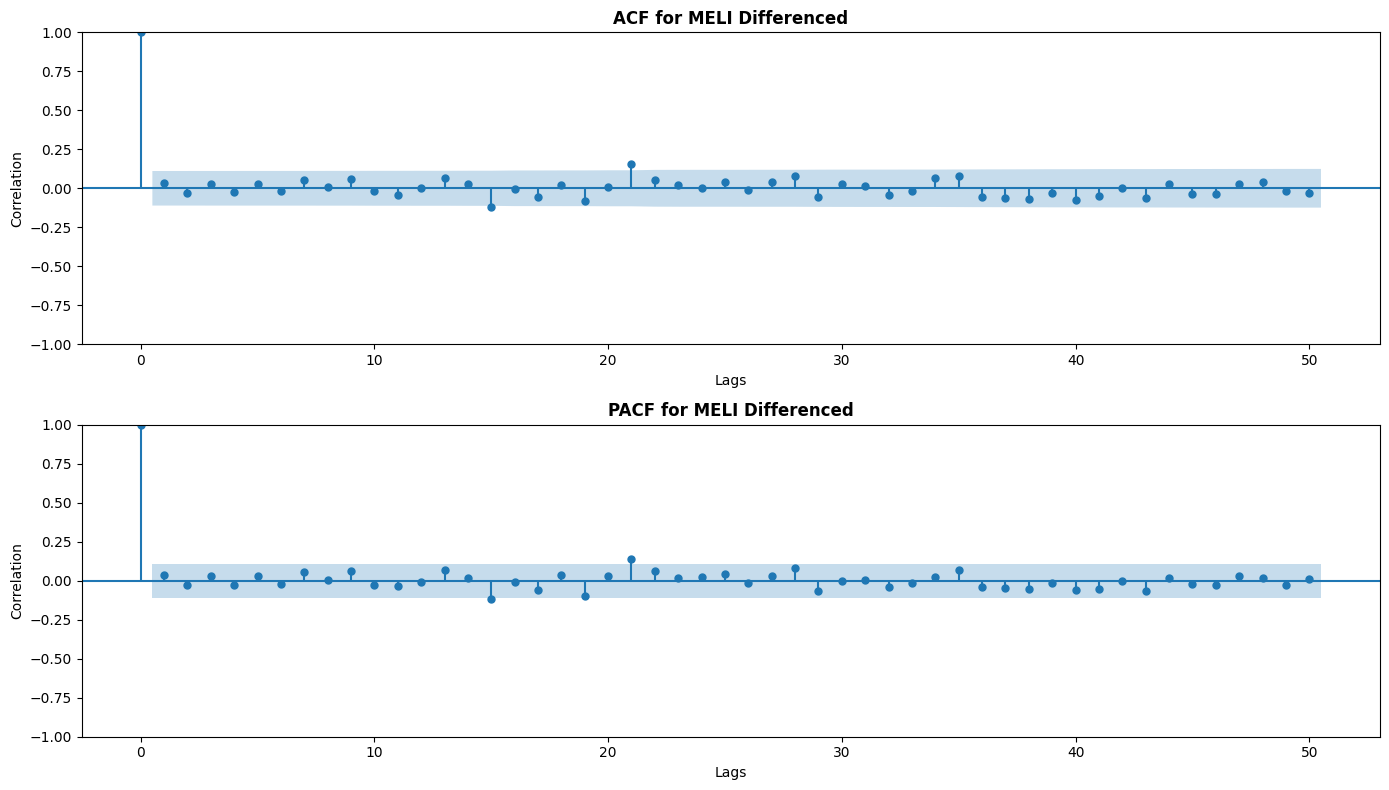


Correlogram Interpretation for MELI Differenced:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

ARMA

Best ARMA model for MELI:
Order: (1, 0, 0)
AIC: 2812.55
                               SARIMAX Results                                
Dep. Variable:                   MELI   No. Observations:                  314
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1403.276
Date:                Sat, 01 Nov 2025   AIC                           2812.552
Time:                        18:53:51   BIC                           2823.800
Sample:                             0   HQIC                          2817.047
                                - 314       

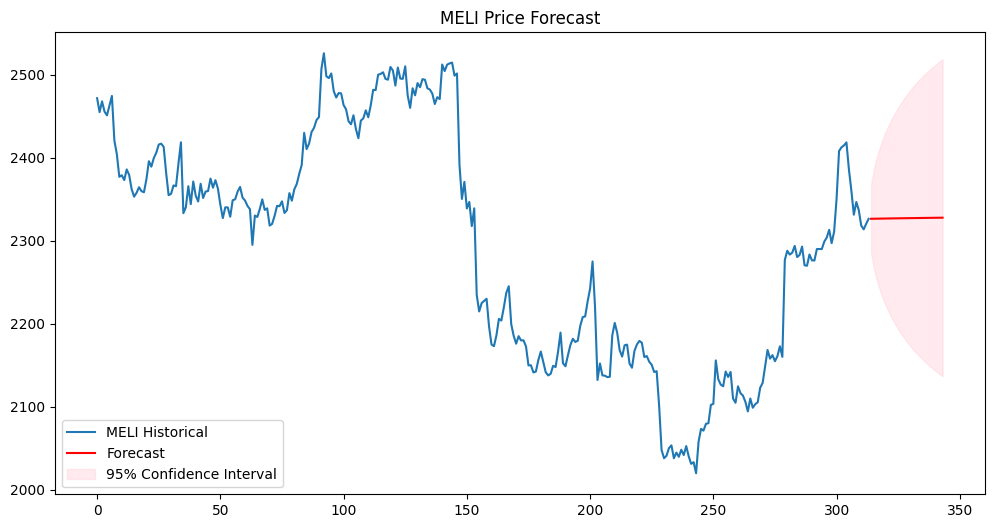


MELI Forecast Values (next 5 periods):
314    2326.564168
315    2326.617667
316    2326.670515
317    2326.722721
318    2326.774292
Name: predicted_mean, dtype: float64

Forecast Interpretation for MELI:
Last observed value: 2326.51
Average forecast value: 2327.26
Forecast change: 0.75
Trend: Upward forecast trend
95% CI range at period 30: [2137.05, 2518.70]
Interpretation: The wider the confidence interval, the less certain the forecast

ARIMA

Best ARIMA model for MELI:
Order: (0, 2, 1)
AIC: 2797.61
INTERPRETATION:
  - p=0: 0 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=1: 1 moving average term(s)
                               SARIMAX Results                                
Dep. Variable:                   MELI   No. Observations:                  314
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1396.803
Date:                Sat, 01 Nov 2025   AIC                           2797.607
Time:                        18:54:11   

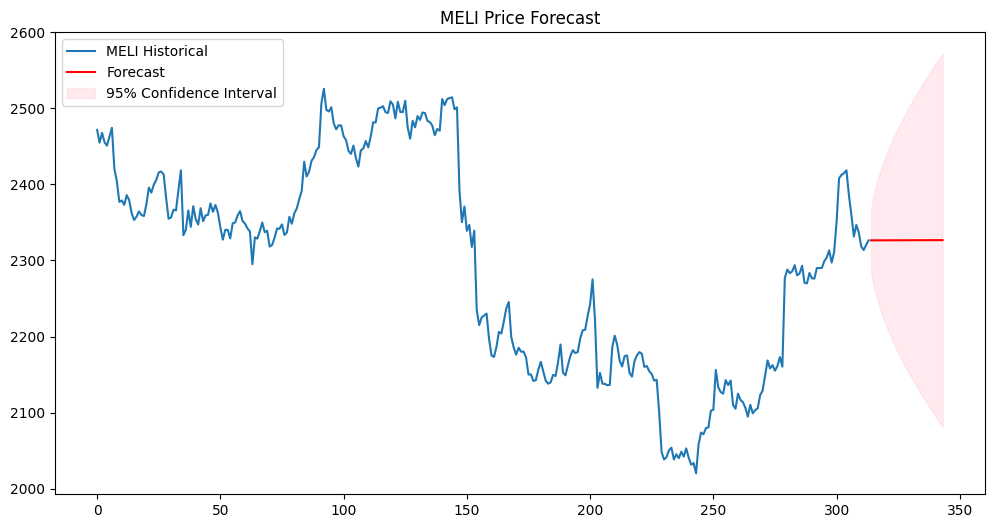


MELI Forecast Values (next 5 periods):
314    2326.519451
315    2326.528893
316    2326.538334
317    2326.547775
318    2326.557217
Name: predicted_mean, dtype: float64

Forecast Interpretation for MELI:
Last observed value: 2326.51
Average forecast value: 2326.66
Forecast change: 0.15
Trend: Upward forecast trend
95% CI range at period 30: [2080.95, 2572.63]
Interpretation: The wider the confidence interval, the less certain the forecast


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Download MELI data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading MELI data from Yahoo Finance...")
data = yf.download("MELI", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

# Extract adjusted close prices
meli_close = data['Close'].dropna()

print(f"Data successfully downloaded!")
print(f"Total data points: {len(meli_close)}")
print(f"Date range: {meli_close.index[0]} to {meli_close.index[-1]}")
print(f"Timezone: {meli_close.index.tz}")


# Calculate returns for better stationarity
meli_returns = meli_close.pct_change().dropna() * 100  # Returns in percentage

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\n{'='*60}")
    print(f"Unit Root Tests for {name}")
    print('='*60)

    # ADF Test
    adf_result = adfuller(series)
    print("\nADF Test (Augmented Dickey-Fuller):")
    print(f'   ADF Statistic: {adf_result[0]:.4f}')
    print(f'   p-value: {adf_result[1]:.4f}')
    print("\n   Interpretation:")
    if adf_result[1] < 0.05:
        print(f"   p-value < 0.05: {name} is STATIONARY")
    else:
        print(f"   p-value >= 0.05: {name} may be NON-STATIONARY")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'   KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'   p-value: {kpss_result[1]:.4f}')
    print("\n   Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"   p-value < 0.05: {name} is NON-STATIONARY")
    else:
        print(f"   p-value >= 0.05: {name} may be STATIONARY")

# Perform unit root tests
unit_root_tests(meli_close, "MELI Original Prices")
unit_root_tests(meli_returns, "MELI Returns")

# Function to plot correlograms
def plot_correlograms(series, name, lags=50):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.tight_layout()
    plt.show()

    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

# Plot correlograms
print("\n" + "="*60)
print("ANALYZING CORRELOGRAMS")
print("="*60)
plot_correlograms(meli_close, "MELI Prices Original")

# Difference the series
meli_diff = meli_close.diff().dropna()
unit_root_tests(meli_diff, "MELI Differenced")
plot_correlograms(meli_diff, "MELI Differenced")

# Function to find best ARMA model
def best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Function to find best ARIMA model
def best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("INTERPRETATION:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order


# Plot detailed forecast with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = model.forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Print forecast values
    print(f"\n{name} Forecast Values (next 5 periods):")
    print(forecast[:5])

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")
    print("Interpretation: The wider the confidence interval, the less certain the forecast")


meli_close = data["Close"]["MELI"].reset_index(drop=True).dropna()

print(f"\n{'='*60}")
print(f"ARMA")
print('='*60)

#ARMA
forecast_steps = 30

meli_arma_model = best_arma(meli_close, "MELI")
print(meli_arma_model.summary())

plot_forecast(meli_arma_model, meli_close, "MELI")

print(f"\n{'='*60}")
print(f"ARIMA")
print('='*60)

#ARIMA
meli_order = best_arima(meli_close, "MELI")

meli_arima_model = ARIMA(meli_close, order=meli_order).fit()
print(meli_arima_model.summary())

last_index = len(meli_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

plot_forecast(meli_arima_model, meli_close, "MELI")

# **AIRBNB (ABNB)**

Pruebas integrales de randon walk, raiz unitaria, modelado ARMA, ARIMA pronostico y análisis de cointegración.

In [ ]:
# Import yfinance (required before using yf.download)
import yfinance as yf

# Download BA data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading ABNB data from Yahoo Finance...")
data = yf.download("ABNB", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ABNB,ABNB,ABNB,ABNB,ABNB
Datetime,,,,,
2025-08-29 07:30:00-06:00,129.630005,131.100006,129.210007,130.009995,523226
2025-08-29 08:30:00-06:00,129.660004,130.240005,129.509995,129.649994,352159
2025-08-29 09:30:00-06:00,130.309998,130.311600,129.380005,129.669998,424691
2025-08-29 10:30:00-06:00,129.899994,130.419998,129.710007,130.330002,387556
2025-08-29 11:30:00-06:00,130.130005,130.380005,129.880005,129.910004,287928
...,...,...,...,...,...
2025-10-31 09:30:00-06:00,126.080002,126.514999,125.599998,126.300003,191860
2025-10-31 10:30:00-06:00,125.870003,126.448898,125.769997,126.110001,139438


[*********************100%***********************]  1 of 1 completed


Data successfully downloaded!
Total data points: 315
Date range: 2025-08-29 07:30:00-06:00 to 2025-10-31 13:30:00-06:00
Timezone: America/Mexico_City

Unit Root Tests for ABNB Original Prices



ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -2.0917
   p-value: 0.2479

   Interpretation:
   p-value >= 0.05: ABNB Original Prices may be NON-STATIONARY

KPSS Test:
   KPSS Statistic: 0.5350
   p-value: 0.0338

   Interpretation:
   p-value < 0.05: ABNB Original Prices is NON-STATIONARY

Unit Root Tests for ABNB Returns

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -5.1080
   p-value: 0.0000

   Interpretation:
   p-value < 0.05: ABNB Returns is STATIONARY

KPSS Test:
   KPSS Statistic: 0.1907
   p-value: 0.1000

   Interpretation:
   p-value >= 0.05: ABNB Returns may be STATIONARY

ANALYZING CORRELOGRAMS


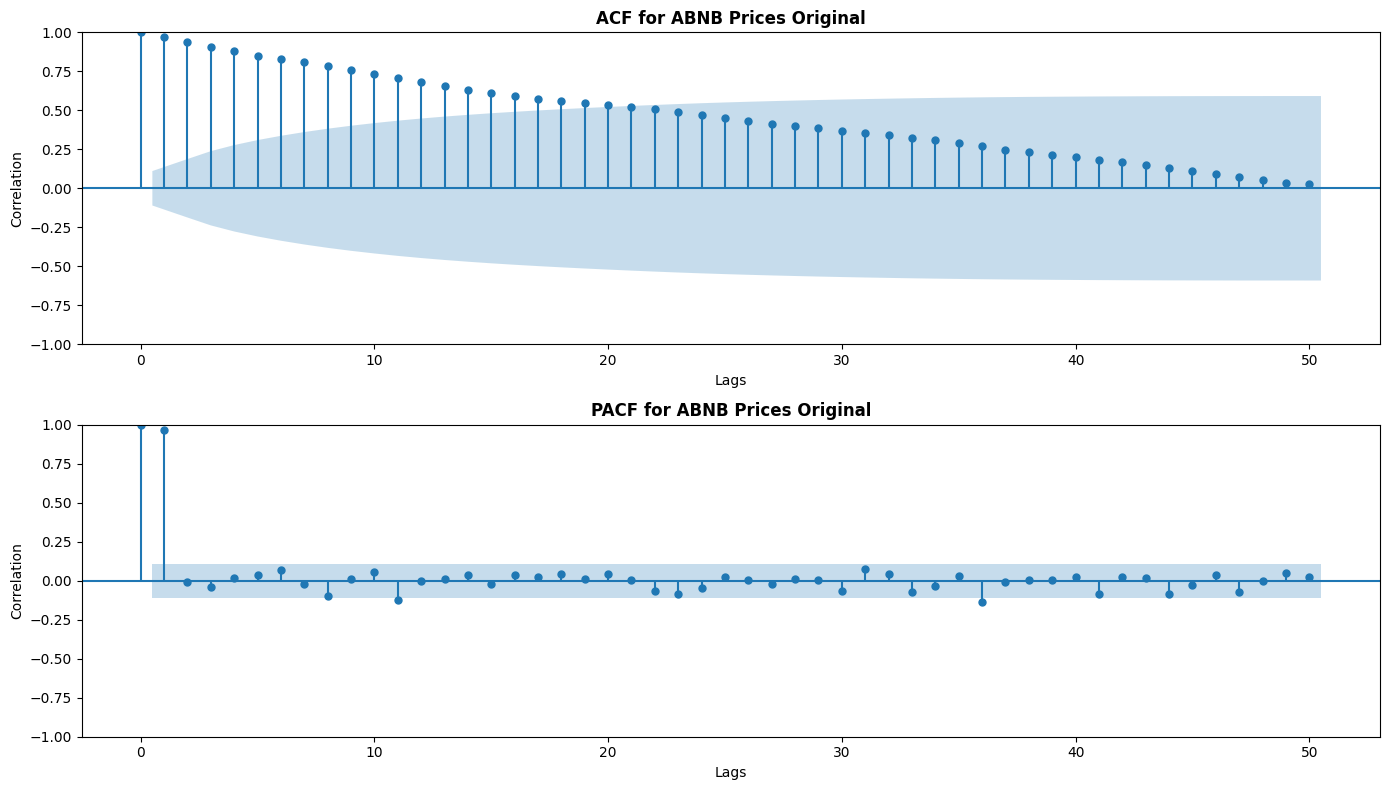


Correlogram Interpretation for ABNB Prices Original:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

Unit Root Tests for ABNB Differenced

ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -5.1021
   p-value: 0.0000

   Interpretation:
   p-value < 0.05: ABNB Differenced is STATIONARY

KPSS Test:
   KPSS Statistic: 0.1945
   p-value: 0.1000

   Interpretation:
   p-value >= 0.05: ABNB Differenced may be STATIONARY


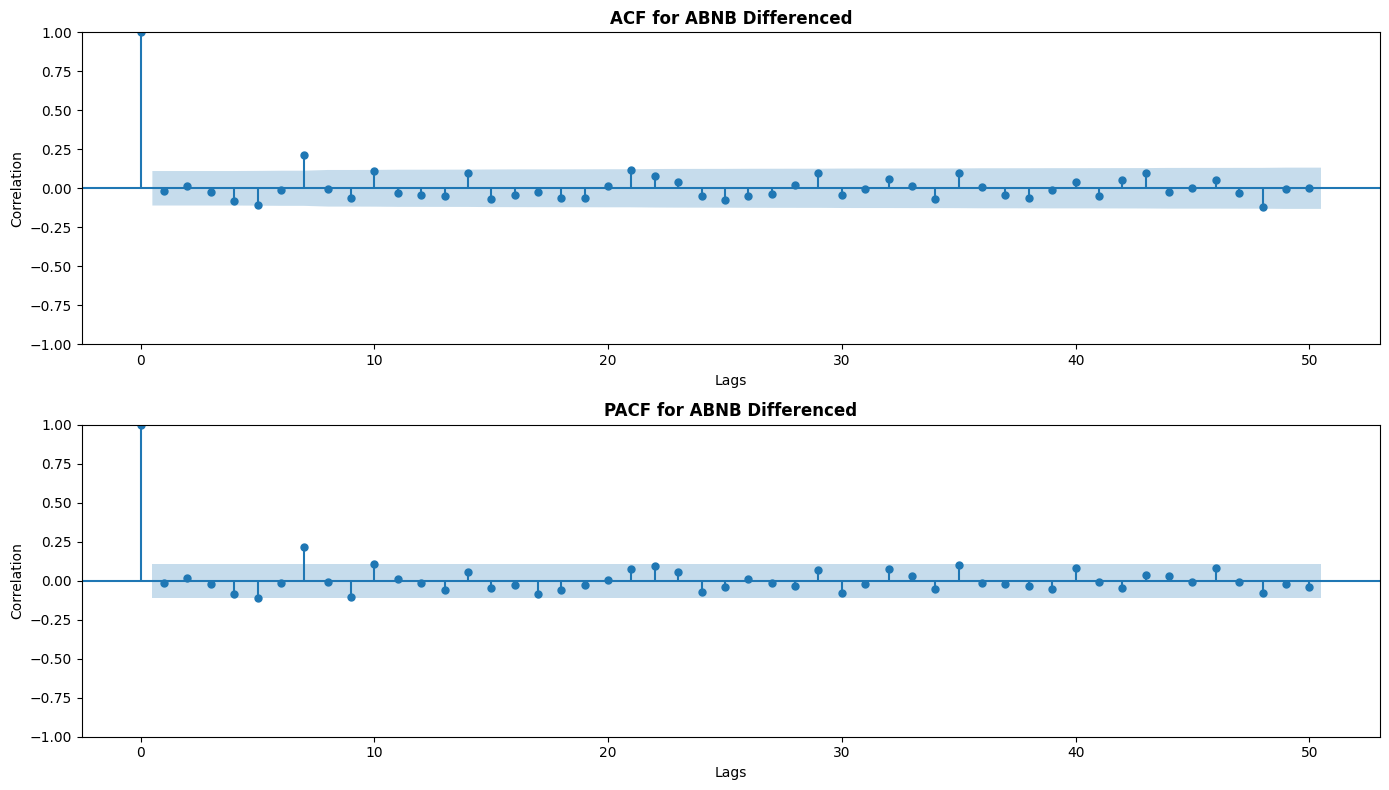


Correlogram Interpretation for ABNB Differenced:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order

ARMA

Best ARMA model for ABNB:
Order: (3, 0, 2)
AIC: 641.43
                               SARIMAX Results                                
Dep. Variable:                   ABNB   No. Observations:                  315
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -313.713
Date:                Sat, 01 Nov 2025   AIC                            641.427
Time:                        18:54:20   BIC                            667.695
Sample:                             0   HQIC                           651.922
                                - 315        

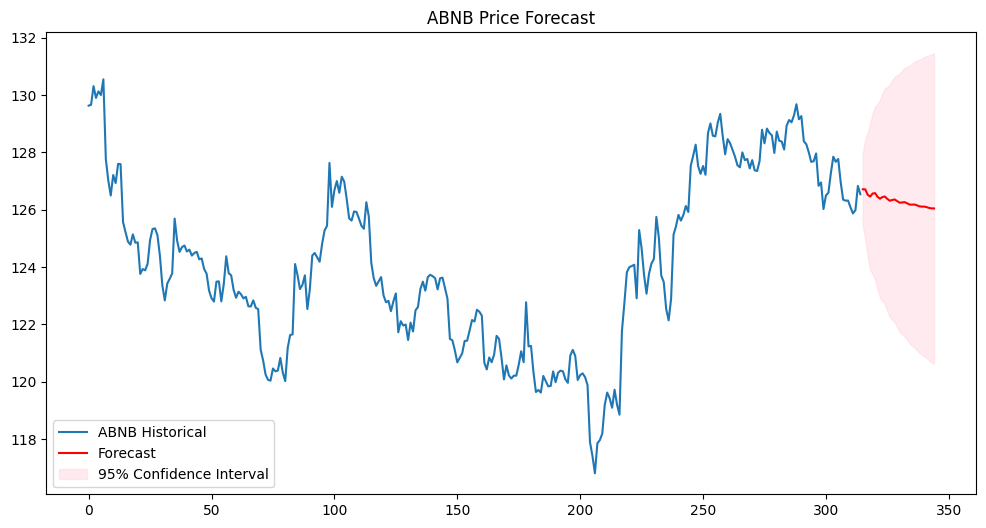


ABNB Forecast Values (next 5 periods):
315    126.713105
316    126.709455
317    126.519158
318    126.458677
319    126.564178
Name: predicted_mean, dtype: float64

Forecast Interpretation for ABNB:
Last observed value: 126.54
Average forecast value: 126.31
Forecast change: -0.23
Trend: Downward forecast trend
95% CI range at period 30: [120.63, 131.46]
Interpretation: The wider the confidence interval, the less certain the forecast

ARIMA

Best ARIMA model for ABNB:
Order: (2, 1, 2)
AIC: 635.36
INTERPRETATION:
  - p=2: 2 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=2: 2 moving average term(s)
                               SARIMAX Results                                
Dep. Variable:                   ABNB   No. Observations:                  315
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -312.678
Date:                Sat, 01 Nov 2025   AIC                            635.355
Time:                        18:54:41   BIC    

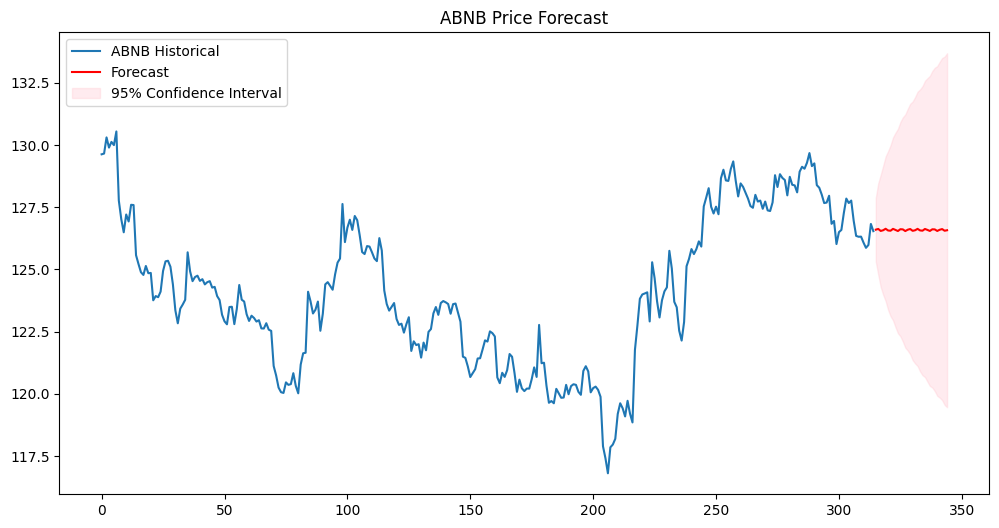


ABNB Forecast Values (next 5 periods):
315    126.600395
316    126.628805
317    126.549292
318    126.576974
319    126.636049
Name: predicted_mean, dtype: float64

Forecast Interpretation for ABNB:
Last observed value: 126.54
Average forecast value: 126.59
Forecast change: 0.05
Trend: Upward forecast trend
95% CI range at period 30: [119.46, 133.69]
Interpretation: The wider the confidence interval, the less certain the forecast


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Download ABNB data from Yahoo Finance (60-minute intervals, 45 days)
print("\nDownloading ABNB data from Yahoo Finance...")
data = yf.download("ABNB", interval="60m", period="45d")

# Convert index to Mexico City timezone
data = data.tz_convert("America/Mexico_City")

# Extract adjusted close prices
abnb_close = data['Close'].dropna()

print(f"Data successfully downloaded!")
print(f"Total data points: {len(abnb_close)}")
print(f"Date range: {abnb_close.index[0]} to {abnb_close.index[-1]}")
print(f"Timezone: {abnb_close.index.tz}")


# Calculate returns for better stationarity
abnb_returns = abnb_close.pct_change().dropna() * 100  # Returns in percentage

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\n{'='*60}")
    print(f"Unit Root Tests for {name}")
    print('='*60)

    # ADF Test
    adf_result = adfuller(series)
    print("\nADF Test (Augmented Dickey-Fuller):")
    print(f'   ADF Statistic: {adf_result[0]:.4f}')
    print(f'   p-value: {adf_result[1]:.4f}')
    print("\n   Interpretation:")
    if adf_result[1] < 0.05:
        print(f"   p-value < 0.05: {name} is STATIONARY")
    else:
        print(f"   p-value >= 0.05: {name} may be NON-STATIONARY")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'   KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'   p-value: {kpss_result[1]:.4f}')
    print("\n   Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"   p-value < 0.05: {name} is NON-STATIONARY")
    else:
        print(f"   p-value >= 0.05: {name} may be STATIONARY")

# Perform unit root tests
unit_root_tests(abnb_close, "ABNB Original Prices")
unit_root_tests(abnb_returns, "ABNB Returns")

# Function to plot correlograms
def plot_correlograms(series, name, lags=50):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Lags')
    plt.ylabel('Correlation')

    plt.tight_layout()
    plt.show()

    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

# Plot correlograms
print("\n" + "="*60)
print("ANALYZING CORRELOGRAMS")
print("="*60)
plot_correlograms(abnb_close, "ABNB Prices Original")

# Difference the series
abnb_diff = abnb_close.diff().dropna()
unit_root_tests(abnb_diff, "ABNB Differenced")
plot_correlograms(abnb_diff, "ABNB Differenced")

# Function to find best ARMA model
def best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Function to find best ARIMA model
def best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("INTERPRETATION:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order


# Plot detailed forecast with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = model.forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Print forecast values
    print(f"\n{name} Forecast Values (next 5 periods):")
    print(forecast[:5])

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")
    print("Interpretation: The wider the confidence interval, the less certain the forecast")


abnb_close = data["Close"]["ABNB"].reset_index(drop=True).dropna()

print(f"\n{'='*60}")
print(f"ARMA")
print('='*60)

#ARMA
forecast_steps = 30

abnb_arma_model = best_arma(abnb_close, "ABNB")
print(abnb_arma_model.summary())

plot_forecast(abnb_arma_model, abnb_close, "ABNB")

print(f"\n{'='*60}")
print(f"ARIMA")
print('='*60)

#ARIMA
abnb_order = best_arima(abnb_close, "ABNB")

abnb_arima_model = ARIMA(abnb_close, order=abnb_order).fit()
print(abnb_arima_model.summary())

last_index = len(abnb_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

plot_forecast(abnb_arima_model, abnb_close, "ABNB")

# **Análisis de cointegración:**

**Google (GOOGL) vs Apple (AAPL)**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
from google.colab import files


# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: GOOGL and AAPL are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between GOOGL and AAPL")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'GOOGL': googl_close,
    'AAPL': aapl_close
}).dropna()
cointegration_test(coint_df)


Johansen Cointegration Test:
Trace statistic: [7.66040878 1.39361944]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Interpretation:
  - r = 0: No cointegration at 95% confidence level
    Trace statistic (7.66) <= 95% critical value (15.49)
  - r = 1: No cointegration at 95% confidence level
    Trace statistic (1.39) <= 95% critical value (3.84)
Conclusion: No evidence of cointegration between GOOGL and AAPL


**Google (GOOGL) vs Boeing Co (BA)**

In [ ]:
# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: GOOGL and BA are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between GOOGL and BA")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'GOOGL': googl_close,
    'BA': ba_close
}).dropna()
cointegration_test(coint_df)


Johansen Cointegration Test:
Trace statistic: [12.66719512  2.38448737]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Interpretation:
  - r = 0: No cointegration at 95% confidence level
    Trace statistic (12.67) <= 95% critical value (15.49)
  - r = 1: No cointegration at 95% confidence level
    Trace statistic (2.38) <= 95% critical value (3.84)
Conclusion: No evidence of cointegration between GOOGL and BA


**Google (GOOGL) vs Chevron Corp (CVX)**



In [ ]:
# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: GOOGL and CVX are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between GOOGL and CVX")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'GOOGL': googl_close,
    'CVX': cvx_close
}).dropna()
cointegration_test(coint_df)


Johansen Cointegration Test:
Trace statistic: [7.98760928 0.93402476]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Interpretation:
  - r = 0: No cointegration at 95% confidence level
    Trace statistic (7.99) <= 95% critical value (15.49)
  - r = 1: No cointegration at 95% confidence level
    Trace statistic (0.93) <= 95% critical value (3.84)
Conclusion: No evidence of cointegration between GOOGL and CVX


**Google (GOOGL) vs Mercado Libre (MELI)**

In [ ]:
# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: GOOGL and MELI are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between GOOGL and MELI")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'GOOGL': googl_close,
    'MELI': meli_close
}).dropna()
cointegration_test(coint_df)


Johansen Cointegration Test:
Trace statistic: [8.19971234 2.42119575]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Interpretation:
  - r = 0: No cointegration at 95% confidence level
    Trace statistic (8.20) <= 95% critical value (15.49)
  - r = 1: No cointegration at 95% confidence level
    Trace statistic (2.42) <= 95% critical value (3.84)
Conclusion: No evidence of cointegration between GOOGL and MELI


**Google (GOOGL) vs AIRBNB (ABNB)**

In [ ]:
# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: GOOGL and ABNB are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between GOOGL and ABNB")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'GOOGL': googl_close,
    'ABNB': abnb_close
}).dropna()
cointegration_test(coint_df)


Johansen Cointegration Test:
Trace statistic: [12.83324482  0.53388957]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Interpretation:
  - r = 0: No cointegration at 95% confidence level
    Trace statistic (12.83) <= 95% critical value (15.49)
  - r = 1: No cointegration at 95% confidence level
    Trace statistic (0.53) <= 95% critical value (3.84)
Conclusion: No evidence of cointegration between GOOGL and ABNB


**Apple (AAPL) vs Chevron Corp (CVX)**

**Apple (AAPL) vs Mercado Libre (MELI)**

**Apple (AAPL) vs Boeing Co (BA)**

**Apple (AAPL) vs Airbnb (ABNB)**

**Chevron Corp (CVX) vs Mercado Libre (MELI)**

PENDIENTE

# **Modelo GARCH (opcional - puntos extras)**

# **Google (GOOGL)**

In [ ]:
!pip install -q arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 9.2 MB/s eta 0:00:00



1. Selecting best ARMA(p,q)
Best ARMA: ARMA(0,1) | AIC: 746.09
Mean model: HARX, lags: None

2. Selecting best distribution

=== Normal ===
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          0.0754  6.107e-02      1.234      0.217 [-4.434e-02,  0.195]

=== StudentsT ===
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0505  2.494e-02      2.025  4.283e-02 [1.631e-03,9.940e-02]

=== SkewStudent ===
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-------------------------------------------------------

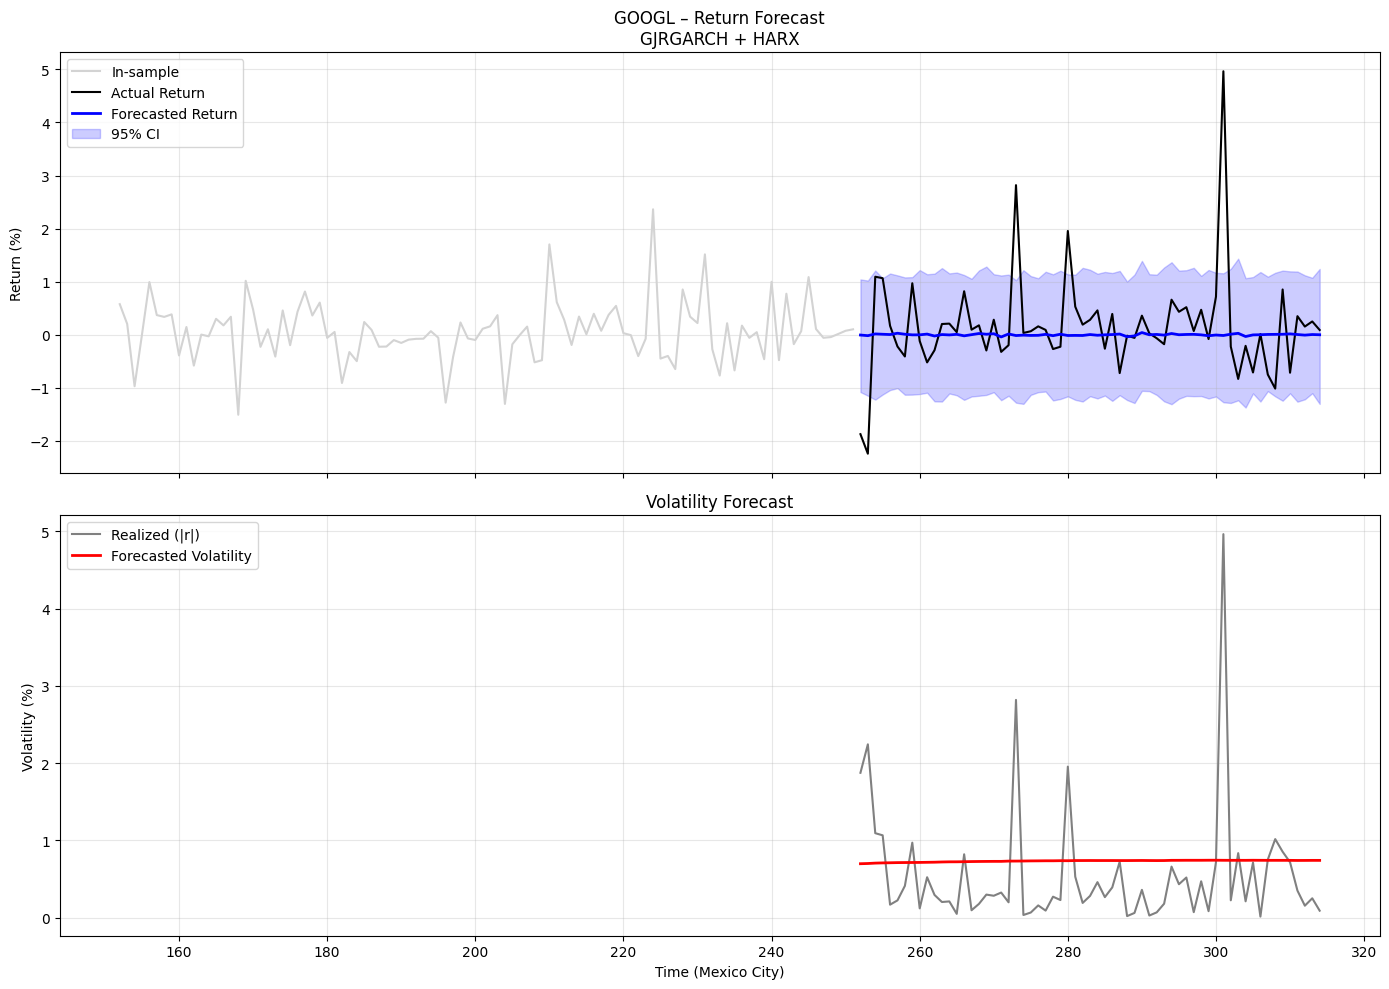


FORECAST SUMMARY
Last return      : +0.1014%
Last volatility  : 0.6988%
Forecast return  : -0.0012%
Forecast vol     : 0.7316%
Return change    : -0.1025%
Expected return  : Down
Volatility trend : Up


In [ ]:
# ------------------------------------------------------------
# ARMA-GARCH FORECAST (GOOGL 60-min)
# ------------------------------------------------------------
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

googl_returns = 100 * np.log(googl_close / googl_close.shift(1)).dropna()

# ------------------------------------------------------------
# 1. Find best ARMA(p,q)
# ------------------------------------------------------------
def find_best_arma(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = (0, 0)
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0: continue
            try:
                model = ARIMA(series, order=(p, 0, q))
                res = model.fit()
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = (p, 0, q)
            except:
                continue
    return best_order, best_aic

print("\n" + "="*60)
print("1. Selecting best ARMA(p,q)")
print("="*60)
arma_order, arma_aic = find_best_arma(googl_returns)
p, _, q = arma_order
print(f"Best ARMA: ARMA({p},{q}) | AIC: {arma_aic:.2f}")

# ------------------------------------------------------------
# 2. Build correct lags for HARX
# ------------------------------------------------------------
# Si hay ARMA → lags 2D: [[AR lags], [MA lags]]
# Si solo AR → lags = [1,2,...,p]
# Si solo MA o ninguno → lags = None
if p > 0 and q > 0:
    ar_lags = list(range(1, p + 1))
    ma_lags = list(range(1, q + 1))
    lags = np.array([ar_lags, ma_lags], dtype=np.int32)
elif p > 0:
    lags = list(range(1, p + 1))
elif q > 0:
    # Solo MA: no se permite en HARX → usamos ZeroMean
    lags = None
    mean_model = 'Zero'
else:
    lags = None
    mean_model = 'Zero'

# Si no hay ARMA, usamos ZeroMean
use_harx = (p > 0 or q > 0)
mean_model = 'HARX' if use_harx else 'Zero'

print(f"Mean model: {mean_model}, lags: {lags}")

# ------------------------------------------------------------
# 3. GARCH(1,1) + best distribution
# ------------------------------------------------------------
print("\n" + "="*60)
print("2. Selecting best distribution")
print("="*60)
dists = {'Normal':'normal', 'StudentsT':'t', 'SkewStudent':'skewt'}
garch_res = {}

for name, dist in dists.items():
    try:
        model = arch_model(googl_returns,
                           mean=mean_model,
                           lags=lags,
                           vol='Garch', p=1, q=1,
                           dist=dist)
        res = model.fit(disp='off')
        garch_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_dist_name = min(garch_res, key=lambda k: garch_res[k].aic) if garch_res else 'Normal'
best_dist_str  = dists.get(best_dist_name, 'normal')
print(f"\nBest distribution: {best_dist_name}")

# ------------------------------------------------------------
# 4. GARCH / EGARCH / GJR-GARCH
# ------------------------------------------------------------
print("\n" + "="*60)
print("3. Selecting best volatility model")
print("="*60)
variants = {
    'GARCH'    : ('Garch', 0),
    'EGARCH'   : ('EGarch', 0),
    'GJRGARCH' : ('Garch', 1)
}
var_res = {}

for name, (vol_str, o_val) in variants.items():
    try:
        model = arch_model(googl_returns,
                           mean=mean_model, lags=lags,
                           vol=vol_str, p=1, o=o_val, q=1,
                           dist=best_dist_str)
        res = model.fit(disp='off')
        var_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_var_name = min(var_res, key=lambda k: var_res[k].aic) if var_res else 'GARCH'
best_vol_str, best_o = variants[best_var_name]
best_res = var_res.get(best_var_name, None)

# Fallback si falla todo
if best_res is None:
    print("Warning: Using fallback GARCH(1,1)")
    final_fallback = arch_model(googl_returns, vol='Garch', p=1, q=1, dist='normal')
    best_res = final_fallback.fit(disp='off')
    best_var_name = 'GARCH'

print(f"\nBEST MODEL: {best_var_name} + {mean_model} + {best_dist_name}")

# ------------------------------------------------------------
# 5. Out-of-sample: Train 80%, Forecast 20%
# ------------------------------------------------------------
train_len = int(0.8 * len(googl_returns))
train_ret = googl_returns.iloc[:train_len]
test_ret  = googl_returns.iloc[train_len:]

# Refit on train
final_model = arch_model(train_ret,
                         mean=mean_model, lags=lags,
                         vol=best_vol_str, p=1, o=best_o, q=1,
                         dist=best_dist_str)
final_res = final_model.fit(disp='off')

horizon = len(test_ret)
forecast = final_res.forecast(horizon=horizon, method='simulation', simulations=2000)

# --- Returns ---
sim_ret = forecast.simulations.residuals[-1]
ret_mean = np.mean(sim_ret, axis=0)
ret_lower = np.percentile(sim_ret, 2.5, axis=0)
ret_upper = np.percentile(sim_ret, 97.5, axis=0)

# --- Volatility ---
sim_var = forecast.simulations.variances[-1]
sim_vol = np.sqrt(sim_var)
vol_mean = np.mean(sim_vol, axis=0)

# ------------------------------------------------------------
# 6. Evaluation
# ------------------------------------------------------------
mae_ret = mean_absolute_error(ret_mean, test_ret)
mae_vol = mean_absolute_error(vol_mean, test_ret.abs())

print(f"\n" + "="*60)
print("OUT-OF-SAMPLE MAE")
print("="*60)
print(f"Returns    : {mae_ret:.4f}%")
print(f"Volatility : {mae_vol:.4f}%")

# ------------------------------------------------------------
# 7. Plot
# ------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax1.plot(train_ret.index[-100:], train_ret.iloc[-100:], color='lightgray', label='In-sample')
ax1.plot(test_ret.index, test_ret, color='black', label='Actual Return')
ax1.plot(test_ret.index, ret_mean, color='blue', linewidth=2, label='Forecasted Return')
ax1.fill_between(test_ret.index, ret_lower, ret_upper, color='blue', alpha=0.2, label='95% CI')
ax1.set_title(f'GOOGL – Return Forecast\n{best_var_name} + {mean_model}')
ax1.set_ylabel('Return (%)')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(test_ret.index, test_ret.abs(), color='gray', label='Realized (|r|)')
ax2.plot(test_ret.index, vol_mean, color='red', linewidth=2, label='Forecasted Volatility')
ax2.set_title('Volatility Forecast')
ax2.set_ylabel('Volatility (%)')
ax2.set_xlabel('Time (Mexico City)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. Summary
# ------------------------------------------------------------
last_ret = train_ret.iloc[-1]
last_vol = final_res.conditional_volatility.iloc[-1]
avg_ret_fc = ret_mean.mean()
avg_vol_fc = vol_mean.mean()

print(f"\n" + "="*60)
print("FORECAST SUMMARY")
print("="*60)
print(f"Last return      : {last_ret:+.4f}%")
print(f"Last volatility  : {last_vol:.4f}%")
print(f"Forecast return  : {avg_ret_fc:+.4f}%")
print(f"Forecast vol     : {avg_vol_fc:.4f}%")
print(f"Return change    : {avg_ret_fc - last_ret:+.4f}%")
trend_ret = "Up" if avg_ret_fc > 0 else "Down" if avg_ret_fc < 0 else "Flat"
trend_vol = "Up" if avg_vol_fc > last_vol else "Down" if avg_vol_fc < last_vol else "Stable"
print(f"Expected return  : {trend_ret}")
print(f"Volatility trend : {trend_vol}")

# **Apple (AAPL)**


1. Selecting best ARMA(p,q)
Best ARMA: ARMA(2,3) | AIC: 498.72
Mean model: AR, lags: 2

2. Selecting best distribution

=== Normal ===
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          0.0441  2.877e-02      1.534      0.125 [-1.224e-02,  0.101]
AAPL[1]        0.0689  6.565e-02      1.050      0.294 [-5.976e-02,  0.198]
AAPL[2]        0.0190  4.819e-02      0.394      0.694 [-7.547e-02,  0.113]

=== StudentsT ===
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0108  1.880e-02      0.573      0.567 [-2.608e-02,4.762e-02]
AAPL[1]        0.0475  6.501e-02      0.730      0.465   [-7.994e-02,  0.175]

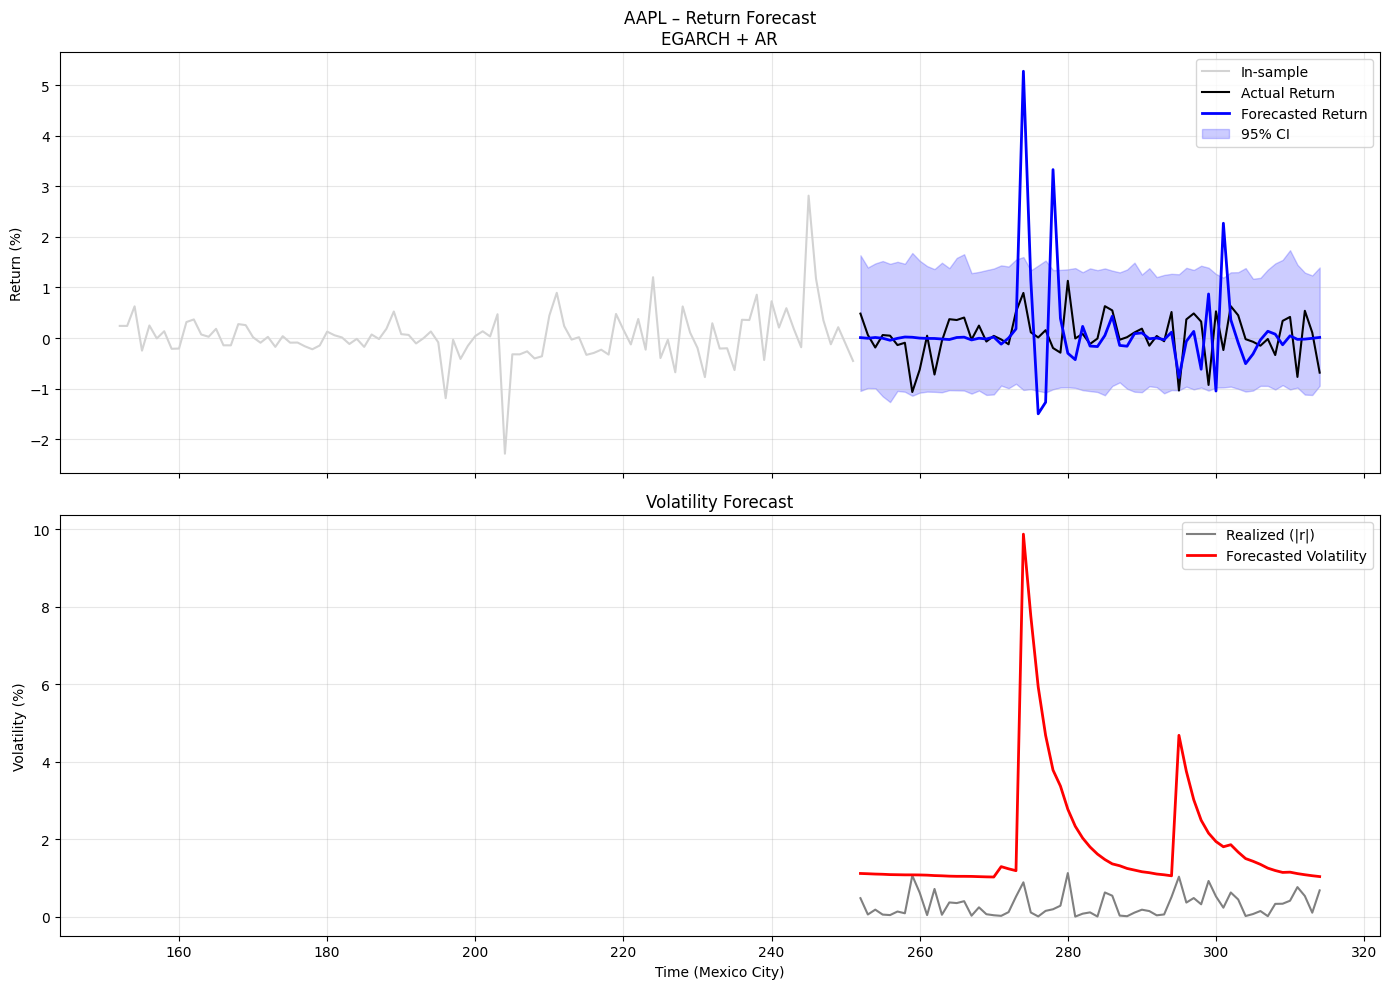


FORECAST SUMMARY
Last return      : -0.4528%
Last volatility  : 1.1227%
Forecast return  : +0.1149%
Forecast vol     : 1.8900%
Return change    : +0.5677%
Expected return  : Up
Volatility trend : Up


In [ ]:
# ------------------------------------------------------------
# ARMA-GARCH FORECAST (AAPL 60-min)
# ------------------------------------------------------------
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

aapl_returns = 100 * np.log(aapl_close / aapl_close.shift(1)).dropna()

# ------------------------------------------------------------
# 1. Find best ARMA(p,q)
# ------------------------------------------------------------
def find_best_arma(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = (0, 0)
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0: continue
            try:
                model = ARIMA(series, order=(p, 0, q))
                res = model.fit()
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = (p, 0, q)
            except:
                continue
    return best_order, best_aic

print("\n" + "="*60)
print("1. Selecting best ARMA(p,q)")
print("="*60)
arma_order, arma_aic = find_best_arma(aapl_returns)
p, _, q = arma_order
print(f"Best ARMA: ARMA({p},{q}) | AIC: {arma_aic:.2f}")

# ------------------------------------------------------------
# 2. Build correct lags for HARX (SOLUCIÓN FINAL)
# ------------------------------------------------------------
if p > 0 and q > 0:
    if p == q:
        ar_lags = list(range(1, p + 1))
        ma_lags = list(range(1, q + 1))
        lags = np.array([ar_lags, ma_lags], dtype=np.int32)
        mean_model = 'HARX'
    else:
        lags = p
        mean_model = 'AR'
elif p > 0:
    lags = p
    mean_model = 'AR'
else:
    lags = None
    mean_model = 'Zero'

print(f"Mean model: {mean_model}, lags: {lags}")

# ------------------------------------------------------------
# 3. GARCH(1,1) + best distribution
# ------------------------------------------------------------
print("\n" + "="*60)
print("2. Selecting best distribution")
print("="*60)
dists = {'Normal':'normal', 'StudentsT':'t', 'SkewStudent':'skewt'}
garch_res = {}

for name, dist in dists.items():
    try:
        model = arch_model(aapl_returns,
                           mean=mean_model,
                           lags=lags,
                           vol='Garch', p=1, q=1,
                           dist=dist)
        res = model.fit(disp='off')
        garch_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_dist_name = min(garch_res, key=lambda k: garch_res[k].aic) if garch_res else 'Normal'
best_dist_str  = dists.get(best_dist_name, 'normal')
print(f"\nBest distribution: {best_dist_name}")

# ------------------------------------------------------------
# 4. GARCH / EGARCH / GJR-GARCH
# ------------------------------------------------------------
print("\n" + "="*60)
print("3. Selecting best volatility model")
print("="*60)
variants = {
    'GARCH'    : ('Garch', 0),
    'EGARCH'   : ('EGarch', 0),
    'GJRGARCH' : ('Garch', 1)
}
var_res = {}

for name, (vol_str, o_val) in variants.items():
    try:
        model = arch_model(aapl_returns,
                           mean=mean_model, lags=lags,
                           vol=vol_str, p=1, o=o_val, q=1,
                           dist=best_dist_str)
        res = model.fit(disp='off')
        var_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_var_name = min(var_res, key=lambda k: var_res[k].aic) if var_res else 'GARCH'
best_vol_str, best_o = variants[best_var_name]
best_res = var_res.get(best_var_name, None)

if best_res is None:
    print("Warning: Using fallback GARCH(1,1)")
    fallback = arch_model(aapl_returns, vol='Garch', p=1, q=1, dist='normal')
    best_res = fallback.fit(disp='off')
    best_var_name = 'GARCH'

print(f"\nBEST MODEL: {best_var_name} + {mean_model} + {best_dist_name}")

# ------------------------------------------------------------
# 5. Out-of-sample: Train 80%, Forecast 20%
# ------------------------------------------------------------
train_len = int(0.8 * len(aapl_returns))
train_ret = aapl_returns.iloc[:train_len]
test_ret  = aapl_returns.iloc[train_len:]

final_model = arch_model(train_ret,
                         mean=mean_model, lags=lags,
                         vol=best_vol_str, p=1, o=best_o, q=1,
                         dist=best_dist_str)
final_res = final_model.fit(disp='off')

horizon = len(test_ret)
forecast = final_res.forecast(horizon=horizon, method='simulation', simulations=2000)

sim_ret = forecast.simulations.residuals[-1]
ret_mean = np.mean(sim_ret, axis=0)
ret_lower = np.percentile(sim_ret, 2.5, axis=0)
ret_upper = np.percentile(sim_ret, 97.5, axis=0)

sim_var = forecast.simulations.variances[-1]
sim_vol = np.sqrt(sim_var)
vol_mean = np.mean(sim_vol, axis=0)

# ------------------------------------------------------------
# 6. Evaluation
# ------------------------------------------------------------
mae_ret = mean_absolute_error(ret_mean, test_ret)
mae_vol = mean_absolute_error(vol_mean, test_ret.abs())

print(f"\n" + "="*60)
print("OUT-OF-SAMPLE MAE")
print("="*60)
print(f"Returns    : {mae_ret:.4f}%")
print(f"Volatility : {mae_vol:.4f}%")

# ------------------------------------------------------------
# 7. Plot
# ------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax1.plot(train_ret.index[-100:], train_ret.iloc[-100:], color='lightgray', label='In-sample')
ax1.plot(test_ret.index, test_ret, color='black', label='Actual Return')
ax1.plot(test_ret.index, ret_mean, color='blue', linewidth=2, label='Forecasted Return')
ax1.fill_between(test_ret.index, ret_lower, ret_upper, color='blue', alpha=0.2, label='95% CI')
ax1.set_title(f'AAPL – Return Forecast\n{best_var_name} + {mean_model}')
ax1.set_ylabel('Return (%)')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(test_ret.index, test_ret.abs(), color='gray', label='Realized (|r|)')
ax2.plot(test_ret.index, vol_mean, color='red', linewidth=2, label='Forecasted Volatility')
ax2.set_title('Volatility Forecast')
ax2.set_ylabel('Volatility (%)')
ax2.set_xlabel('Time (Mexico City)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. Summary
# ------------------------------------------------------------
last_ret = train_ret.iloc[-1]
last_vol = final_res.conditional_volatility.iloc[-1]
avg_ret_fc = ret_mean.mean()
avg_vol_fc = vol_mean.mean()

print(f"\n" + "="*60)
print("FORECAST SUMMARY")
print("="*60)
print(f"Last return      : {last_ret:+.4f}%")
print(f"Last volatility  : {last_vol:.4f}%")
print(f"Forecast return  : {avg_ret_fc:+.4f}%")
print(f"Forecast vol     : {avg_vol_fc:.4f}%")
print(f"Return change    : {avg_ret_fc - last_ret:+.4f}%")
trend_ret = "Up" if avg_ret_fc > 0 else "Down" if avg_ret_fc < 0 else "Flat"
trend_vol = "Up" if avg_vol_fc > last_vol else "Down" if avg_vol_fc < last_vol else "Stable"
print(f"Expected return  : {trend_ret}")
print(f"Volatility trend : {trend_vol}")

# **Chevron Corporation (CVX)**


1. Selecting best ARMA(p,q)
Best ARMA: ARMA(2,3) | AIC: 417.30
Mean model: AR, lags: 2

2. Selecting best distribution

=== Normal ===
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -6.8152e-03  2.762e-02     -0.247      0.805 [-6.096e-02,4.733e-02]
CVX[1]         -0.1287  5.783e-02     -2.225  2.605e-02   [ -0.242,-1.535e-02]
CVX[2]         -0.0115  3.994e-02     -0.289      0.773 [-8.981e-02,6.676e-02]

=== StudentsT ===
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -7.4332e-03  1.909e-02     -0.389      0.697 [-4.484e-02,2.997e-02]
CVX[1]     -9.6311e-03  5.471e-02     -0.176      0.860

/tmp/ipython-input-3947744187.py:139: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  final_res = final_model.fit(disp='off')



OUT-OF-SAMPLE MAE
Returns    : 0.3068%
Volatility : 0.3938%


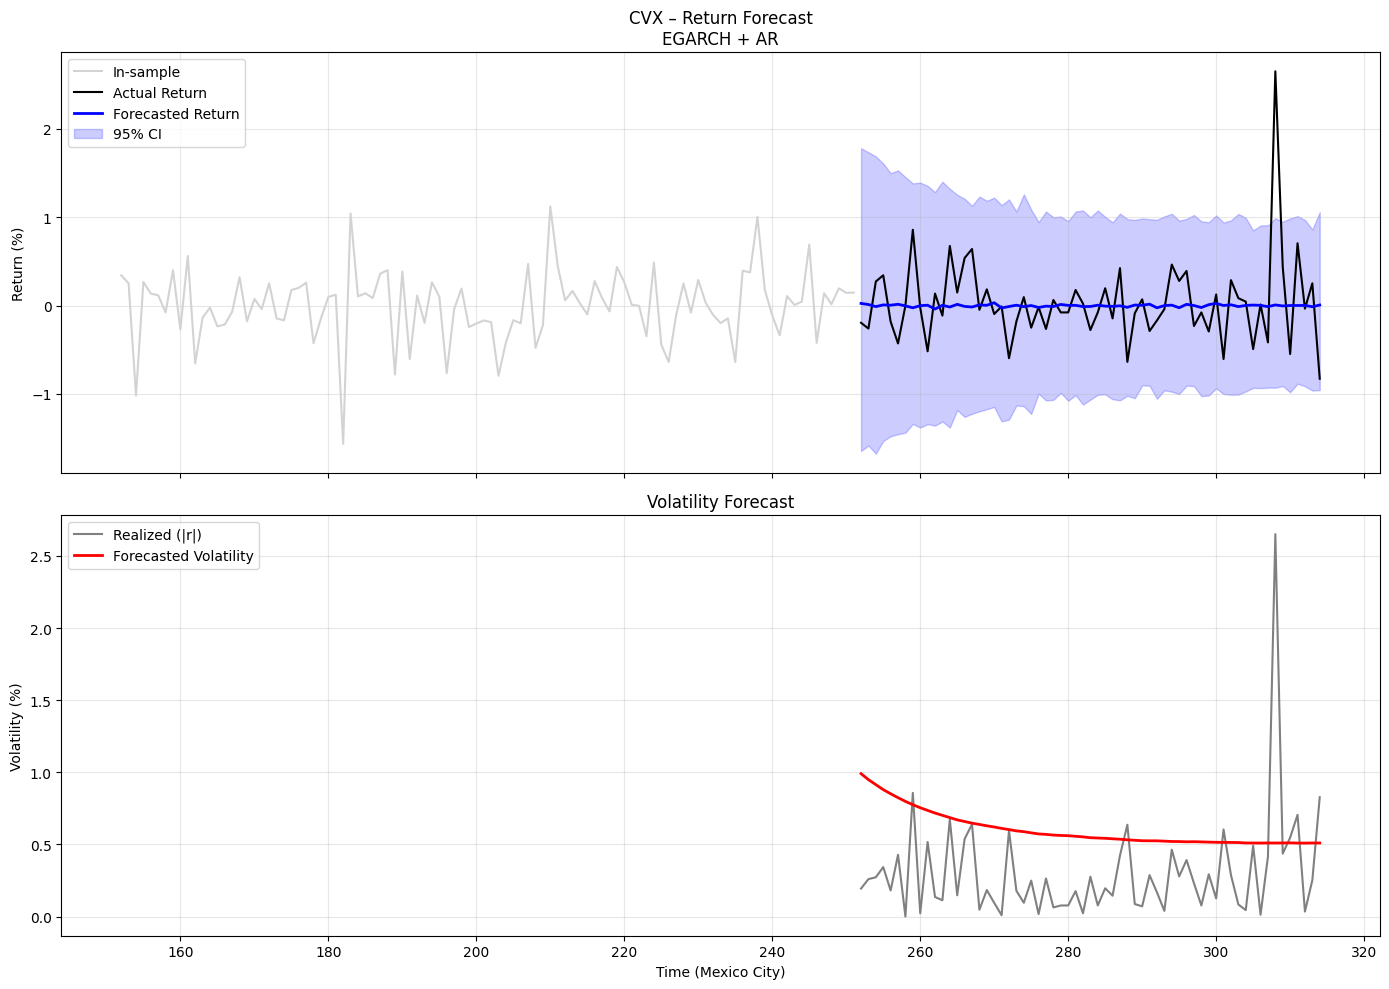


FORECAST SUMMARY
Last return      : +0.1470%
Last volatility  : 0.5691%
Forecast return  : -0.0015%
Forecast vol     : 0.6036%
Return change    : -0.1485%
Expected return  : Down
Volatility trend : Up


In [ ]:
# ------------------------------------------------------------
# ARMA-GARCH FORECAST (CVX 60-min)
# ------------------------------------------------------------
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

cvx_returns = 100 * np.log(cvx_close / cvx_close.shift(1)).dropna()

# ------------------------------------------------------------
# 1. Find best ARMA(p,q)
# ------------------------------------------------------------
def find_best_arma(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = (0, 0)
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0: continue
            try:
                model = ARIMA(series, order=(p, 0, q))
                res = model.fit()
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = (p, 0, q)
            except:
                continue
    return best_order, best_aic

print("\n" + "="*60)
print("1. Selecting best ARMA(p,q)")
print("="*60)
arma_order, arma_aic = find_best_arma(cvx_returns)
p, _, q = arma_order
print(f"Best ARMA: ARMA({p},{q}) | AIC: {arma_aic:.2f}")

# ------------------------------------------------------------
# 2. Build correct lags for HARX (SOLUCIÓN FINAL – SIN ERRORES)
# ------------------------------------------------------------
if p > 0 and q > 0:
    if p == q:
        ar_lags = list(range(1, p + 1))
        ma_lags = list(range(1, q + 1))
        lags = np.array([ar_lags, ma_lags], dtype=np.int32)
        mean_model = 'HARX'
    else:
        lags = p
        mean_model = 'AR'
elif p > 0:
    lags = p
    mean_model = 'AR'
else:
    lags = None
    mean_model = 'Zero'

print(f"Mean model: {mean_model}, lags: {lags}")

# ------------------------------------------------------------
# 3. GARCH(1,1) + best distribution
# ------------------------------------------------------------
print("\n" + "="*60)
print("2. Selecting best distribution")
print("="*60)
dists = {'Normal':'normal', 'StudentsT':'t', 'SkewStudent':'skewt'}
garch_res = {}

for name, dist in dists.items():
    try:
        model = arch_model(cvx_returns,
                           mean=mean_model,
                           lags=lags,
                           vol='Garch', p=1, q=1,
                           dist=dist)
        res = model.fit(disp='off')
        garch_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_dist_name = min(garch_res, key=lambda k: garch_res[k].aic) if garch_res else 'Normal'
best_dist_str  = dists.get(best_dist_name, 'normal')
print(f"\nBest distribution: {best_dist_name}")

# ------------------------------------------------------------
# 4. GARCH / EGARCH / GJR-GARCH
# ------------------------------------------------------------
print("\n" + "="*60)
print("3. Selecting best volatility model")
print("="*60)
variants = {
    'GARCH'    : ('Garch', 0),
    'EGARCH'   : ('EGarch', 0),
    'GJRGARCH' : ('Garch', 1)
}
var_res = {}

for name, (vol_str, o_val) in variants.items():
    try:
        model = arch_model(cvx_returns,
                           mean=mean_model, lags=lags,
                           vol=vol_str, p=1, o=o_val, q=1,
                           dist=best_dist_str)
        res = model.fit(disp='off')
        var_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_var_name = min(var_res, key=lambda k: var_res[k].aic) if var_res else 'GARCH'
best_vol_str, best_o = variants[best_var_name]
best_res = var_res.get(best_var_name, None)

if best_res is None:
    print("Warning: Using fallback GARCH(1,1)")
    fallback = arch_model(cvx_returns, vol='Garch', p=1, q=1, dist='normal')
    best_res = fallback.fit(disp='off')
    best_var_name = 'GARCH'

print(f"\nBEST MODEL: {best_var_name} + {mean_model} + {best_dist_name}")

# ------------------------------------------------------------
# 5. Out-of-sample: Train 80%, Forecast 20%
# ------------------------------------------------------------
train_len = int(0.8 * len(cvx_returns))
train_ret = cvx_returns.iloc[:train_len]
test_ret  = cvx_returns.iloc[train_len:]

final_model = arch_model(train_ret,
                         mean=mean_model, lags=lags,
                         vol=best_vol_str, p=1, o=best_o, q=1,
                         dist=best_dist_str)
final_res = final_model.fit(disp='off')

horizon = len(test_ret)
forecast = final_res.forecast(horizon=horizon, method='simulation', simulations=2000)

sim_ret = forecast.simulations.residuals[-1]
ret_mean = np.mean(sim_ret, axis=0)
ret_lower = np.percentile(sim_ret, 2.5, axis=0)
ret_upper = np.percentile(sim_ret, 97.5, axis=0)

sim_var = forecast.simulations.variances[-1]
sim_vol = np.sqrt(sim_var)
vol_mean = np.mean(sim_vol, axis=0)

# ------------------------------------------------------------
# 6. Evaluation
# ------------------------------------------------------------
mae_ret = mean_absolute_error(ret_mean, test_ret)
mae_vol = mean_absolute_error(vol_mean, test_ret.abs())

print(f"\n" + "="*60)
print("OUT-OF-SAMPLE MAE")
print("="*60)
print(f"Returns    : {mae_ret:.4f}%")
print(f"Volatility : {mae_vol:.4f}%")

# ------------------------------------------------------------
# 7. Plot
# ------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax1.plot(train_ret.index[-100:], train_ret.iloc[-100:], color='lightgray', label='In-sample')
ax1.plot(test_ret.index, test_ret, color='black', label='Actual Return')
ax1.plot(test_ret.index, ret_mean, color='blue', linewidth=2, label='Forecasted Return')
ax1.fill_between(test_ret.index, ret_lower, ret_upper, color='blue', alpha=0.2, label='95% CI')
ax1.set_title(f'CVX – Return Forecast\n{best_var_name} + {mean_model}')  # ← CORREGIDO
ax1.set_ylabel('Return (%)')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(test_ret.index, test_ret.abs(), color='gray', label='Realized (|r|)')
ax2.plot(test_ret.index, vol_mean, color='red', linewidth=2, label='Forecasted Volatility')
ax2.set_title('Volatility Forecast')
ax2.set_ylabel('Volatility (%)')
ax2.set_xlabel('Time (Mexico City)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. Summary
# ------------------------------------------------------------
last_ret = train_ret.iloc[-1]
last_vol = final_res.conditional_volatility.iloc[-1]
avg_ret_fc = ret_mean.mean()
avg_vol_fc = vol_mean.mean()

print(f"\n" + "="*60)
print("FORECAST SUMMARY")
print("="*60)
print(f"Last return      : {last_ret:+.4f}%")
print(f"Last volatility  : {last_vol:.4f}%")
print(f"Forecast return  : {avg_ret_fc:+.4f}%")
print(f"Forecast vol     : {avg_vol_fc:.4f}%")
print(f"Return change    : {avg_ret_fc - last_ret:+.4f}%")
trend_ret = "Up" if avg_ret_fc > 0 else "Down" if avg_ret_fc < 0 else "Flat"
trend_vol = "Up" if avg_vol_fc > last_vol else "Down" if avg_vol_fc < last_vol else "Stable"
print(f"Expected return  : {trend_ret}")
print(f"Volatility trend : {trend_vol}")

# **Mercado Libre (MELI)**


1. Selecting best ARMA(p,q)
Best ARMA: ARMA(0,1) | AIC: 841.22
Mean model: HARX, lags: None

2. Selecting best distribution

=== Normal ===
                                Mean Model                               
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
Const      -6.4898e-03  5.930e-02     -0.109      0.913 [ -0.123,  0.110]

=== StudentsT ===
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          0.0398  3.767e-02      1.055      0.291 [-3.408e-02,  0.114]

=== SkewStudent ===
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------------------------------------

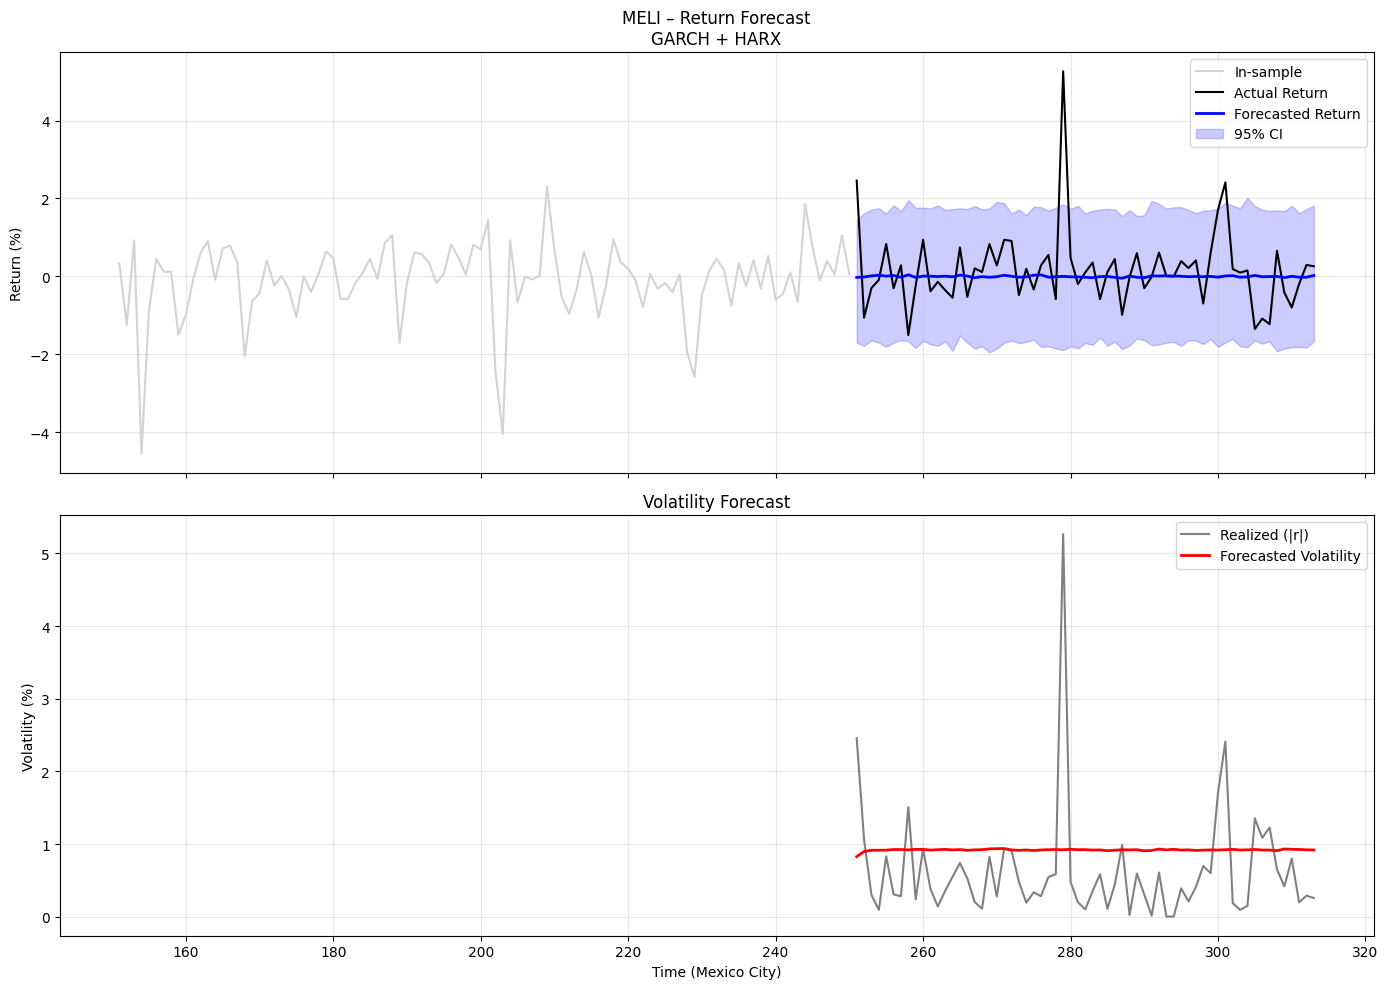


FORECAST SUMMARY
Last return      : +0.0599%
Last volatility  : 0.9644%
Forecast return  : -0.0053%
Forecast vol     : 0.9191%
Return change    : -0.0652%
Expected return  : Down
Volatility trend : Down


In [ ]:
# ------------------------------------------------------------
# ARMA-GARCH FORECAST (MELI 60-min)
# ------------------------------------------------------------
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

meli_returns = 100 * np.log(meli_close / meli_close.shift(1)).dropna()

# ------------------------------------------------------------
# 1. Find best ARMA(p,q)
# ------------------------------------------------------------
def find_best_arma(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = (0, 0)
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0: continue
            try:
                model = ARIMA(series, order=(p, 0, q))
                res = model.fit()
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = (p, 0, q)
            except:
                continue
    return best_order, best_aic

print("\n" + "="*60)
print("1. Selecting best ARMA(p,q)")
print("="*60)
arma_order, arma_aic = find_best_arma(meli_returns)
p, _, q = arma_order
print(f"Best ARMA: ARMA({p},{q}) | AIC: {arma_aic:.2f}")

# ------------------------------------------------------------
# 2. Build correct lags for HARX
# ------------------------------------------------------------
# Si hay ARMA → lags 2D: [[AR lags], [MA lags]]
# Si solo AR → lags = [1,2,...,p]
# Si solo MA o ninguno → lags = None
if p > 0 and q > 0:
    ar_lags = list(range(1, p + 1))
    ma_lags = list(range(1, q + 1))
    lags = np.array([ar_lags, ma_lags], dtype=np.int32)
elif p > 0:
    lags = list(range(1, p + 1))
elif q > 0:
    # Solo MA: no se permite en HARX → usamos ZeroMean
    lags = None
    mean_model = 'Zero'
else:
    lags = None
    mean_model = 'Zero'

# Si no hay ARMA, usamos ZeroMean
use_harx = (p > 0 or q > 0)
mean_model = 'HARX' if use_harx else 'Zero'

print(f"Mean model: {mean_model}, lags: {lags}")

# ------------------------------------------------------------
# 3. GARCH(1,1) + best distribution
# ------------------------------------------------------------
print("\n" + "="*60)
print("2. Selecting best distribution")
print("="*60)
dists = {'Normal':'normal', 'StudentsT':'t', 'SkewStudent':'skewt'}
garch_res = {}

for name, dist in dists.items():
    try:
        model = arch_model(meli_returns,
                           mean=mean_model,
                           lags=lags,
                           vol='Garch', p=1, q=1,
                           dist=dist)
        res = model.fit(disp='off')
        garch_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_dist_name = min(garch_res, key=lambda k: garch_res[k].aic) if garch_res else 'Normal'
best_dist_str  = dists.get(best_dist_name, 'normal')
print(f"\nBest distribution: {best_dist_name}")

# ------------------------------------------------------------
# 4. GARCH / EGARCH / GJR-GARCH
# ------------------------------------------------------------
print("\n" + "="*60)
print("3. Selecting best volatility model")
print("="*60)
variants = {
    'GARCH'    : ('Garch', 0),
    'EGARCH'   : ('EGarch', 0),
    'GJRGARCH' : ('Garch', 1)
}
var_res = {}

for name, (vol_str, o_val) in variants.items():
    try:
        model = arch_model(meli_returns,
                           mean=mean_model, lags=lags,
                           vol=vol_str, p=1, o=o_val, q=1,
                           dist=best_dist_str)
        res = model.fit(disp='off')
        var_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_var_name = min(var_res, key=lambda k: var_res[k].aic) if var_res else 'GARCH'
best_vol_str, best_o = variants[best_var_name]
best_res = var_res.get(best_var_name, None)

# Fallback si falla todo
if best_res is None:
    print("Warning: Using fallback GARCH(1,1)")
    final_fallback = arch_model(meli_returns, vol='Garch', p=1, q=1, dist='normal')
    best_res = final_fallback.fit(disp='off')
    best_var_name = 'GARCH'

print(f"\nBEST MODEL: {best_var_name} + {mean_model} + {best_dist_name}")

# ------------------------------------------------------------
# 5. Out-of-sample: Train 80%, Forecast 20%
# ------------------------------------------------------------
train_len = int(0.8 * len(meli_returns))
train_ret = meli_returns.iloc[:train_len]
test_ret  = meli_returns.iloc[train_len:]

# Refit on train
final_model = arch_model(train_ret,
                         mean=mean_model, lags=lags,
                         vol=best_vol_str, p=1, o=best_o, q=1,
                         dist=best_dist_str)
final_res = final_model.fit(disp='off')

horizon = len(test_ret)
forecast = final_res.forecast(horizon=horizon, method='simulation', simulations=2000)

# --- Returns ---
sim_ret = forecast.simulations.residuals[-1]
ret_mean = np.mean(sim_ret, axis=0)
ret_lower = np.percentile(sim_ret, 2.5, axis=0)
ret_upper = np.percentile(sim_ret, 97.5, axis=0)

# --- Volatility ---
sim_var = forecast.simulations.variances[-1]
sim_vol = np.sqrt(sim_var)
vol_mean = np.mean(sim_vol, axis=0)

# ------------------------------------------------------------
# 6. Evaluation
# ------------------------------------------------------------
mae_ret = mean_absolute_error(ret_mean, test_ret)
mae_vol = mean_absolute_error(vol_mean, test_ret.abs())

print(f"\n" + "="*60)
print("OUT-OF-SAMPLE MAE")
print("="*60)
print(f"Returns    : {mae_ret:.4f}%")
print(f"Volatility : {mae_vol:.4f}%")

# ------------------------------------------------------------
# 7. Plot
# ------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax1.plot(train_ret.index[-100:], train_ret.iloc[-100:], color='lightgray', label='In-sample')
ax1.plot(test_ret.index, test_ret, color='black', label='Actual Return')
ax1.plot(test_ret.index, ret_mean, color='blue', linewidth=2, label='Forecasted Return')
ax1.fill_between(test_ret.index, ret_lower, ret_upper, color='blue', alpha=0.2, label='95% CI')
ax1.set_title(f'MELI – Return Forecast\n{best_var_name} + {mean_model}')
ax1.set_ylabel('Return (%)')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(test_ret.index, test_ret.abs(), color='gray', label='Realized (|r|)')
ax2.plot(test_ret.index, vol_mean, color='red', linewidth=2, label='Forecasted Volatility')
ax2.set_title('Volatility Forecast')
ax2.set_ylabel('Volatility (%)')
ax2.set_xlabel('Time (Mexico City)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. Summary
# ------------------------------------------------------------
last_ret = train_ret.iloc[-1]
last_vol = final_res.conditional_volatility.iloc[-1]
avg_ret_fc = ret_mean.mean()
avg_vol_fc = vol_mean.mean()

print(f"\n" + "="*60)
print("FORECAST SUMMARY")
print("="*60)
print(f"Last return      : {last_ret:+.4f}%")
print(f"Last volatility  : {last_vol:.4f}%")
print(f"Forecast return  : {avg_ret_fc:+.4f}%")
print(f"Forecast vol     : {avg_vol_fc:.4f}%")
print(f"Return change    : {avg_ret_fc - last_ret:+.4f}%")
trend_ret = "Up" if avg_ret_fc > 0 else "Down" if avg_ret_fc < 0 else "Flat"
trend_vol = "Up" if avg_vol_fc > last_vol else "Down" if avg_vol_fc < last_vol else "Stable"
print(f"Expected return  : {trend_ret}")
print(f"Volatility trend : {trend_vol}")

# **Boeing Co (BA)**


1. Selecting best ARMA(p,q)
Best ARMA: ARMA(2,2) | AIC: 651.52
Mean model: HARX, lags: [[1 2]
 [1 2]]

2. Selecting best distribution

=== Normal ===
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const         -0.0422  4.031e-02     -1.048      0.295 [ -0.121,3.676e-02]
BA[0:1]       -0.0568  7.482e-02     -0.759      0.448 [ -0.203,8.985e-02]
BA[1:2]    8.8362e-04  5.277e-02  1.674e-02      0.987   [ -0.103,  0.104]

=== StudentsT ===
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const          -0.0110  2.297e-02     -0.480      0.631 [-5.603e-02,3.400e-02]
BA[0:1]        -0.1375  5.635e-02     -2.440  1.468e-02   [ -0.2

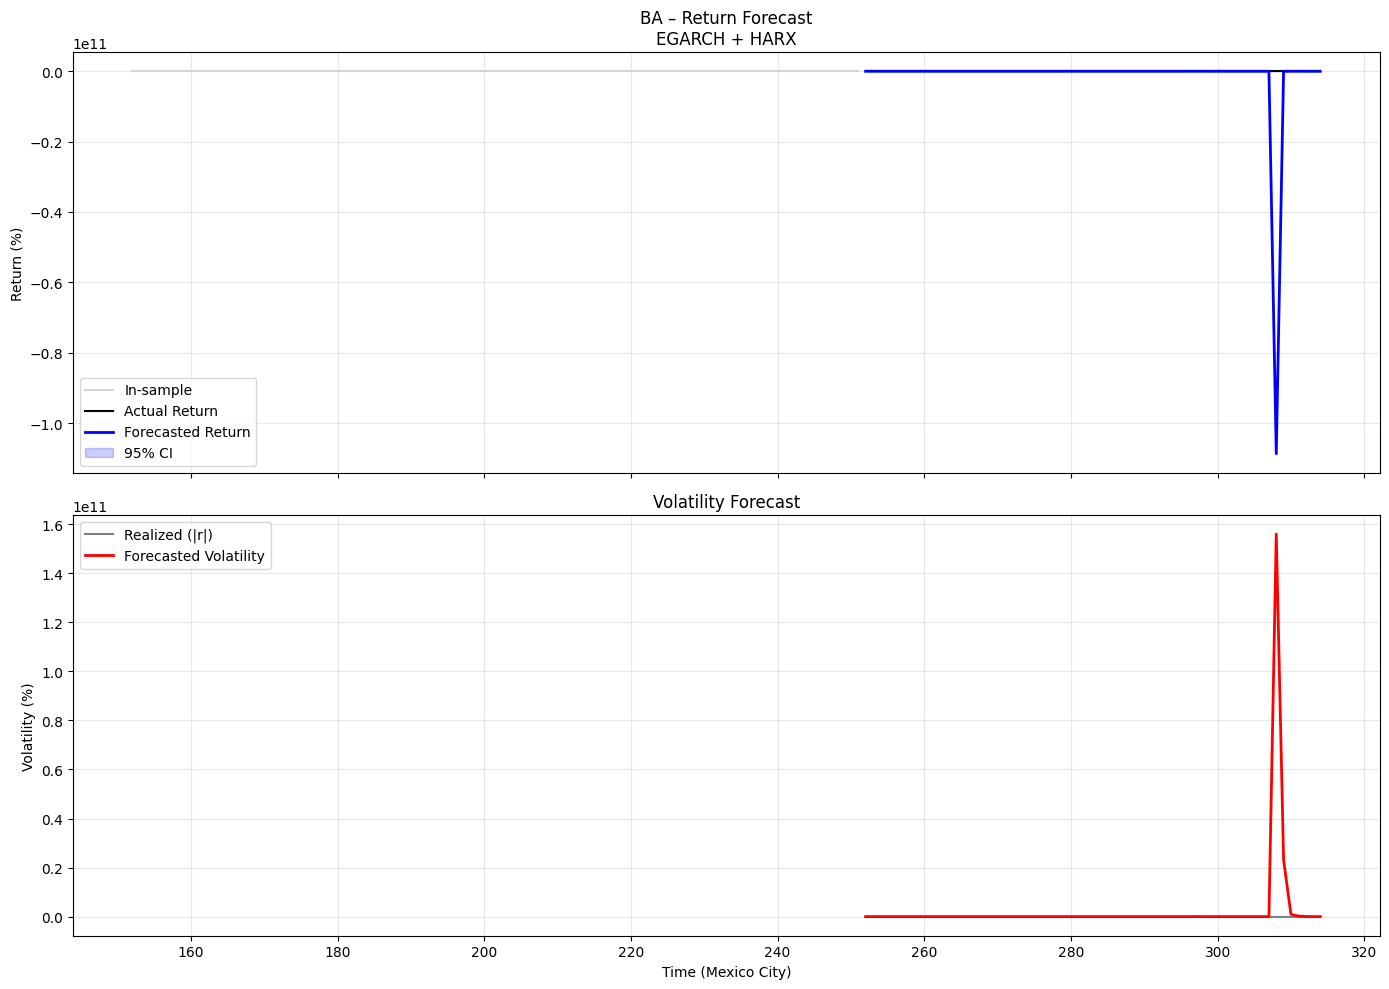


FORECAST SUMMARY
Last return      : +0.0877%
Last volatility  : 1.1229%
Forecast return  : -1725331715.4532%
Forecast vol     : 2861775899.7137%
Return change    : -1725331715.5409%
Expected return  : Down
Volatility trend : Up


In [ ]:
# ------------------------------------------------------------
# ARMA-GARCH FORECAST (BA 60-min)
# ------------------------------------------------------------
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

ba_returns = 100 * np.log(ba_close / ba_close.shift(1)).dropna()

# ------------------------------------------------------------
# 1. Find best ARMA(p,q)
# ------------------------------------------------------------
def find_best_arma(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = (0, 0)
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0: continue
            try:
                model = ARIMA(series, order=(p, 0, q))
                res = model.fit()
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = (p, 0, q)
            except:
                continue
    return best_order, best_aic

print("\n" + "="*60)
print("1. Selecting best ARMA(p,q)")
print("="*60)
arma_order, arma_aic = find_best_arma(ba_returns)
p, _, q = arma_order
print(f"Best ARMA: ARMA({p},{q}) | AIC: {arma_aic:.2f}")

# ------------------------------------------------------------
# 2. Build correct lags for HARX
# ------------------------------------------------------------
# Si hay ARMA → lags 2D: [[AR lags], [MA lags]]
# Si solo AR → lags = [1,2,...,p]
# Si solo MA o ninguno → lags = None
if p > 0 and q > 0:
    ar_lags = list(range(1, p + 1))
    ma_lags = list(range(1, q + 1))
    lags = np.array([ar_lags, ma_lags], dtype=np.int32)
elif p > 0:
    lags = list(range(1, p + 1))
elif q > 0:
    # Solo MA: no se permite en HARX → usamos ZeroMean
    lags = None
    mean_model = 'Zero'
else:
    lags = None
    mean_model = 'Zero'

# Si no hay ARMA, usamos ZeroMean
use_harx = (p > 0 or q > 0)
mean_model = 'HARX' if use_harx else 'Zero'

print(f"Mean model: {mean_model}, lags: {lags}")

# ------------------------------------------------------------
# 3. GARCH(1,1) + best distribution
# ------------------------------------------------------------
print("\n" + "="*60)
print("2. Selecting best distribution")
print("="*60)
dists = {'Normal':'normal', 'StudentsT':'t', 'SkewStudent':'skewt'}
garch_res = {}

for name, dist in dists.items():
    try:
        model = arch_model(ba_returns,
                           mean=mean_model,
                           lags=lags,
                           vol='Garch', p=1, q=1,
                           dist=dist)
        res = model.fit(disp='off')
        garch_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_dist_name = min(garch_res, key=lambda k: garch_res[k].aic) if garch_res else 'Normal'
best_dist_str  = dists.get(best_dist_name, 'normal')
print(f"\nBest distribution: {best_dist_name}")

# ------------------------------------------------------------
# 4. GARCH / EGARCH / GJR-GARCH
# ------------------------------------------------------------
print("\n" + "="*60)
print("3. Selecting best volatility model")
print("="*60)
variants = {
    'GARCH'    : ('Garch', 0),
    'EGARCH'   : ('EGarch', 0),
    'GJRGARCH' : ('Garch', 1)
}
var_res = {}

for name, (vol_str, o_val) in variants.items():
    try:
        model = arch_model(ba_returns,
                           mean=mean_model, lags=lags,
                           vol=vol_str, p=1, o=o_val, q=1,
                           dist=best_dist_str)
        res = model.fit(disp='off')
        var_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_var_name = min(var_res, key=lambda k: var_res[k].aic) if var_res else 'GARCH'
best_vol_str, best_o = variants[best_var_name]
best_res = var_res.get(best_var_name, None)

# Fallback si falla todo
if best_res is None:
    print("Warning: Using fallback GARCH(1,1)")
    final_fallback = arch_model(ba_returns, vol='Garch', p=1, q=1, dist='normal')
    best_res = final_fallback.fit(disp='off')
    best_var_name = 'GARCH'

print(f"\nBEST MODEL: {best_var_name} + {mean_model} + {best_dist_name}")

# ------------------------------------------------------------
# 5. Out-of-sample: Train 80%, Forecast 20%
# ------------------------------------------------------------
train_len = int(0.8 * len(ba_returns))
train_ret = ba_returns.iloc[:train_len]
test_ret  = ba_returns.iloc[train_len:]

# Refit on train
final_model = arch_model(train_ret,
                         mean=mean_model, lags=lags,
                         vol=best_vol_str, p=1, o=best_o, q=1,
                         dist=best_dist_str)
final_res = final_model.fit(disp='off')

horizon = len(test_ret)
forecast = final_res.forecast(horizon=horizon, method='simulation', simulations=2000)

# --- Returns ---
sim_ret = forecast.simulations.residuals[-1]
ret_mean = np.mean(sim_ret, axis=0)
ret_lower = np.percentile(sim_ret, 2.5, axis=0)
ret_upper = np.percentile(sim_ret, 97.5, axis=0)

# --- Volatility ---
sim_var = forecast.simulations.variances[-1]
sim_vol = np.sqrt(sim_var)
vol_mean = np.mean(sim_vol, axis=0)

# ------------------------------------------------------------
# 6. Evaluation
# ------------------------------------------------------------
mae_ret = mean_absolute_error(ret_mean, test_ret)
mae_vol = mean_absolute_error(vol_mean, test_ret.abs())

print(f"\n" + "="*60)
print("OUT-OF-SAMPLE MAE")
print("="*60)
print(f"Returns    : {mae_ret:.4f}%")
print(f"Volatility : {mae_vol:.4f}%")

# ------------------------------------------------------------
# 7. Plot
# ------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax1.plot(train_ret.index[-100:], train_ret.iloc[-100:], color='lightgray', label='In-sample')
ax1.plot(test_ret.index, test_ret, color='black', label='Actual Return')
ax1.plot(test_ret.index, ret_mean, color='blue', linewidth=2, label='Forecasted Return')
ax1.fill_between(test_ret.index, ret_lower, ret_upper, color='blue', alpha=0.2, label='95% CI')
ax1.set_title(f'BA – Return Forecast\n{best_var_name} + {mean_model}')
ax1.set_ylabel('Return (%)')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(test_ret.index, test_ret.abs(), color='gray', label='Realized (|r|)')
ax2.plot(test_ret.index, vol_mean, color='red', linewidth=2, label='Forecasted Volatility')
ax2.set_title('Volatility Forecast')
ax2.set_ylabel('Volatility (%)')
ax2.set_xlabel('Time (Mexico City)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. Summary
# ------------------------------------------------------------
last_ret = train_ret.iloc[-1]
last_vol = final_res.conditional_volatility.iloc[-1]
avg_ret_fc = ret_mean.mean()
avg_vol_fc = vol_mean.mean()

print(f"\n" + "="*60)
print("FORECAST SUMMARY")
print("="*60)
print(f"Last return      : {last_ret:+.4f}%")
print(f"Last volatility  : {last_vol:.4f}%")
print(f"Forecast return  : {avg_ret_fc:+.4f}%")
print(f"Forecast vol     : {avg_vol_fc:.4f}%")
print(f"Return change    : {avg_ret_fc - last_ret:+.4f}%")
trend_ret = "Up" if avg_ret_fc > 0 else "Down" if avg_ret_fc < 0 else "Flat"
trend_vol = "Up" if avg_vol_fc > last_vol else "Down" if avg_vol_fc < last_vol else "Stable"
print(f"Expected return  : {trend_ret}")
print(f"Volatility trend : {trend_vol}")

# **Airbnb (ABNB)**


1. Selecting best ARMA(p,q)
Best ARMA: ARMA(2,2) | AIC: 499.32
Mean model: HARX, lags: [[1 2]
 [1 2]]

2. Selecting best distribution

=== Normal ===
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const         -0.0135  2.925e-02     -0.462      0.644 [-7.086e-02,4.381e-02]
ABNB[0:1]     -0.0312  6.272e-02     -0.498      0.619    [ -0.154,9.170e-02]
ABNB[1:2]      0.0200  5.357e-02      0.374      0.708   [-8.496e-02,  0.125]

=== StudentsT ===
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const         -0.0313  2.277e-02     -1.373      0.170 [-7.589e-02,1.335e-02]
ABNB[0:1]      0.0230  6.188e-02      0.372      0

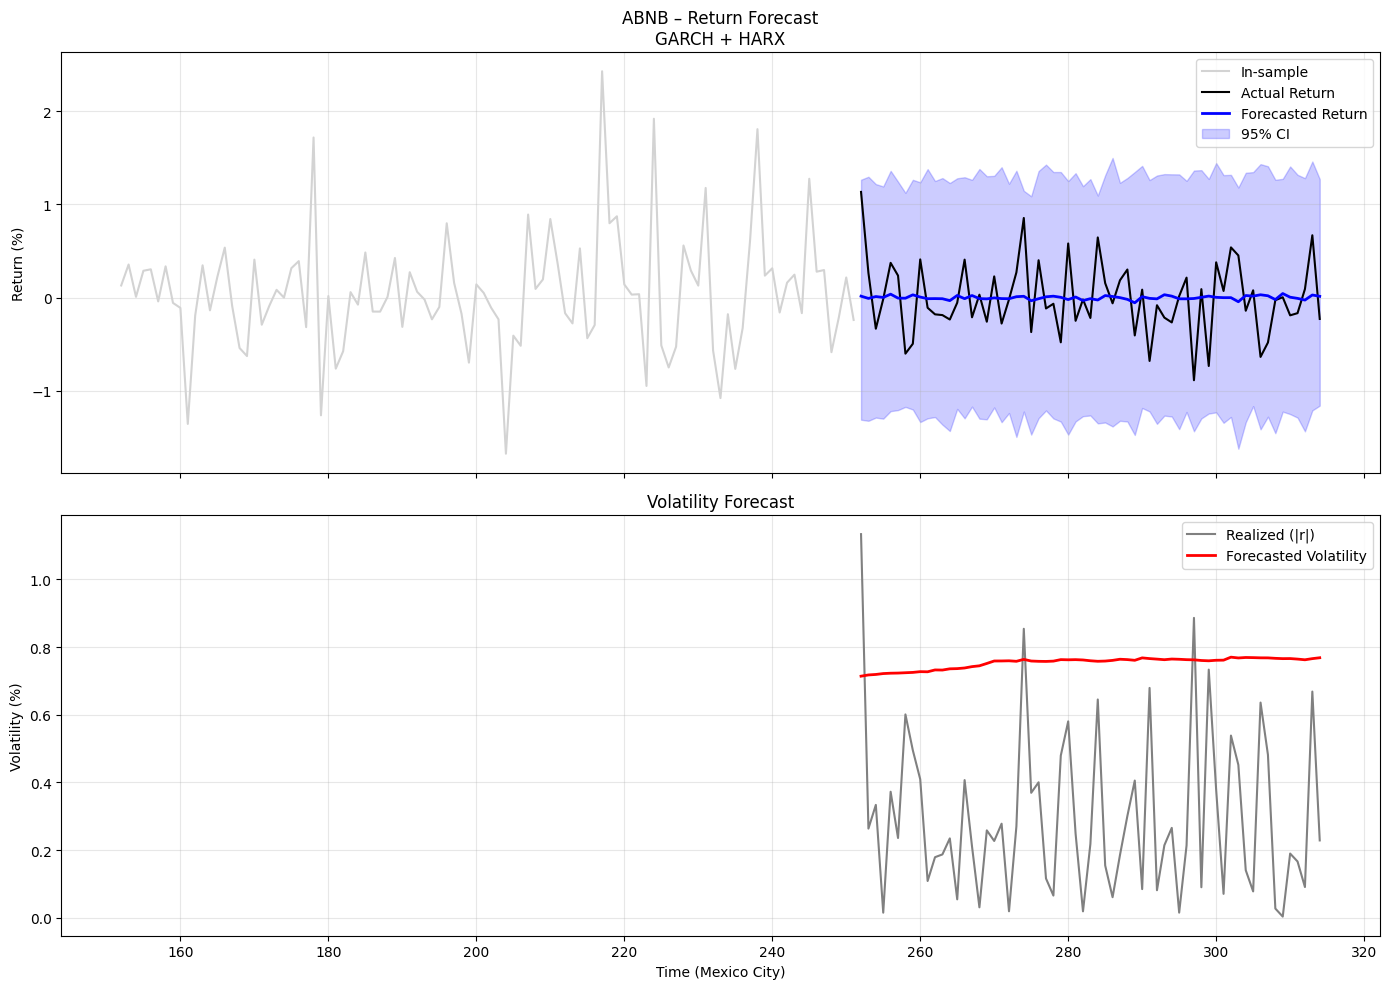


FORECAST SUMMARY
Last return      : -0.2397%
Last volatility  : 0.7302%
Forecast return  : -0.0004%
Forecast vol     : 0.7534%
Return change    : +0.2393%
Expected return  : Down
Volatility trend : Up


In [ ]:
# ------------------------------------------------------------
# ARMA-GARCH FORECAST (ABNB 60-min)
# ------------------------------------------------------------
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

abnb_returns = 100 * np.log(abnb_close / abnb_close.shift(1)).dropna()

# ------------------------------------------------------------
# 1. Find best ARMA(p,q)
# ------------------------------------------------------------
def find_best_arma(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = (0, 0)
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0: continue
            try:
                model = ARIMA(series, order=(p, 0, q))
                res = model.fit()
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = (p, 0, q)
            except:
                continue
    return best_order, best_aic

print("\n" + "="*60)
print("1. Selecting best ARMA(p,q)")
print("="*60)
arma_order, arma_aic = find_best_arma(abnb_returns)
p, _, q = arma_order
print(f"Best ARMA: ARMA({p},{q}) | AIC: {arma_aic:.2f}")

# ------------------------------------------------------------
# 2. Build correct lags for HARX
# ------------------------------------------------------------
# Si hay ARMA → lags 2D: [[AR lags], [MA lags]]
# Si solo AR → lags = [1,2,...,p]
# Si solo MA o ninguno → lags = None
if p > 0 and q > 0:
    ar_lags = list(range(1, p + 1))
    ma_lags = list(range(1, q + 1))
    lags = np.array([ar_lags, ma_lags], dtype=np.int32)
elif p > 0:
    lags = list(range(1, p + 1))
elif q > 0:
    # Solo MA: no se permite en HARX → usamos ZeroMean
    lags = None
    mean_model = 'Zero'
else:
    lags = None
    mean_model = 'Zero'

# Si no hay ARMA, usamos ZeroMean
use_harx = (p > 0 or q > 0)
mean_model = 'HARX' if use_harx else 'Zero'

print(f"Mean model: {mean_model}, lags: {lags}")

# ------------------------------------------------------------
# 3. GARCH(1,1) + best distribution
# ------------------------------------------------------------
print("\n" + "="*60)
print("2. Selecting best distribution")
print("="*60)
dists = {'Normal':'normal', 'StudentsT':'t', 'SkewStudent':'skewt'}
garch_res = {}

for name, dist in dists.items():
    try:
        model = arch_model(abnb_returns,
                           mean=mean_model,
                           lags=lags,
                           vol='Garch', p=1, q=1,
                           dist=dist)
        res = model.fit(disp='off')
        garch_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_dist_name = min(garch_res, key=lambda k: garch_res[k].aic) if garch_res else 'Normal'
best_dist_str  = dists.get(best_dist_name, 'normal')
print(f"\nBest distribution: {best_dist_name}")

# ------------------------------------------------------------
# 4. GARCH / EGARCH / GJR-GARCH
# ------------------------------------------------------------
print("\n" + "="*60)
print("3. Selecting best volatility model")
print("="*60)
variants = {
    'GARCH'    : ('Garch', 0),
    'EGARCH'   : ('EGarch', 0),
    'GJRGARCH' : ('Garch', 1)
}
var_res = {}

for name, (vol_str, o_val) in variants.items():
    try:
        model = arch_model(abnb_returns,
                           mean=mean_model, lags=lags,
                           vol=vol_str, p=1, o=o_val, q=1,
                           dist=best_dist_str)
        res = model.fit(disp='off')
        var_res[name] = res
        print(f"\n=== {name} ===")
        print(res.summary().tables[1])
    except Exception as e:
        print(f"Warning: {name} failed: {e}")
        continue

best_var_name = min(var_res, key=lambda k: var_res[k].aic) if var_res else 'GARCH'
best_vol_str, best_o = variants[best_var_name]
best_res = var_res.get(best_var_name, None)

# Fallback si falla todo
if best_res is None:
    print("Warning: Using fallback GARCH(1,1)")
    final_fallback = arch_model(abnb_returns, vol='Garch', p=1, q=1, dist='normal')
    best_res = final_fallback.fit(disp='off')
    best_var_name = 'GARCH'

print(f"\nBEST MODEL: {best_var_name} + {mean_model} + {best_dist_name}")

# ------------------------------------------------------------
# 5. Out-of-sample: Train 80%, Forecast 20%
# ------------------------------------------------------------
train_len = int(0.8 * len(abnb_returns))
train_ret = abnb_returns.iloc[:train_len]
test_ret  = abnb_returns.iloc[train_len:]

# Refit on train
final_model = arch_model(train_ret,
                         mean=mean_model, lags=lags,
                         vol=best_vol_str, p=1, o=best_o, q=1,
                         dist=best_dist_str)
final_res = final_model.fit(disp='off')

horizon = len(test_ret)
forecast = final_res.forecast(horizon=horizon, method='simulation', simulations=2000)

# --- Returns ---
sim_ret = forecast.simulations.residuals[-1]
ret_mean = np.mean(sim_ret, axis=0)
ret_lower = np.percentile(sim_ret, 2.5, axis=0)
ret_upper = np.percentile(sim_ret, 97.5, axis=0)

# --- Volatility ---
sim_var = forecast.simulations.variances[-1]
sim_vol = np.sqrt(sim_var)
vol_mean = np.mean(sim_vol, axis=0)

# ------------------------------------------------------------
# 6. Evaluation
# ------------------------------------------------------------
mae_ret = mean_absolute_error(ret_mean, test_ret)
mae_vol = mean_absolute_error(vol_mean, test_ret.abs())

print(f"\n" + "="*60)
print("OUT-OF-SAMPLE MAE")
print("="*60)
print(f"Returns    : {mae_ret:.4f}%")
print(f"Volatility : {mae_vol:.4f}%")

# ------------------------------------------------------------
# 7. Plot
# ------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax1.plot(train_ret.index[-100:], train_ret.iloc[-100:], color='lightgray', label='In-sample')
ax1.plot(test_ret.index, test_ret, color='black', label='Actual Return')
ax1.plot(test_ret.index, ret_mean, color='blue', linewidth=2, label='Forecasted Return')
ax1.fill_between(test_ret.index, ret_lower, ret_upper, color='blue', alpha=0.2, label='95% CI')
ax1.set_title(f'ABNB – Return Forecast\n{best_var_name} + {mean_model}')
ax1.set_ylabel('Return (%)')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(test_ret.index, test_ret.abs(), color='gray', label='Realized (|r|)')
ax2.plot(test_ret.index, vol_mean, color='red', linewidth=2, label='Forecasted Volatility')
ax2.set_title('Volatility Forecast')
ax2.set_ylabel('Volatility (%)')
ax2.set_xlabel('Time (Mexico City)')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. Summary
# ------------------------------------------------------------
last_ret = train_ret.iloc[-1]
last_vol = final_res.conditional_volatility.iloc[-1]
avg_ret_fc = ret_mean.mean()
avg_vol_fc = vol_mean.mean()

print(f"\n" + "="*60)
print("FORECAST SUMMARY")
print("="*60)
print(f"Last return      : {last_ret:+.4f}%")
print(f"Last volatility  : {last_vol:.4f}%")
print(f"Forecast return  : {avg_ret_fc:+.4f}%")
print(f"Forecast vol     : {avg_vol_fc:.4f}%")
print(f"Return change    : {avg_ret_fc - last_ret:+.4f}%")
trend_ret = "Up" if avg_ret_fc > 0 else "Down" if avg_ret_fc < 0 else "Flat"
trend_vol = "Up" if avg_vol_fc > last_vol else "Down" if avg_vol_fc < last_vol else "Stable"
print(f"Expected return  : {trend_ret}")
print(f"Volatility trend : {trend_vol}")

# **EXPORTAR**

In [ ]:
# PARA EXPORTAR

from google.colab import files
import nbformat
from nbconvert import HTMLExporter

# Paso 1: Cargar tu archivo .ipynb
print("Por favor, selecciona tu archivo .ipynb")
uploaded = files.upload()

# Paso 2: Obtener el nombre del archivo cargado
notebook_filename = list(uploaded.keys())[0]
print(f"\nArchivo cargado: {notebook_filename}")

# Paso 3: Leer el notebook
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Paso 4: Convertir a HTML
print("Convirtiendo a HTML...")
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'
(body, resources) = html_exporter.from_notebook_node(notebook)

# Paso 5: Guardar el archivo HTML
html_filename = notebook_filename.replace('.ipynb', '.html')
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

print(f"Conversión completada: {html_filename}")

# Paso 6: Descargar el archivo HTML
print("Descargando archivo HTML...")
files.download(html_filename)
print("¡Listo! Tu archivo HTML ha sido descargado.")

Por favor, selecciona tu archivo .ipynb


Saving Proyecto_Final_Modelos_ARMA_Equipo_9_Capital_Analyst.ipynb to Proyecto_Final_Modelos_ARMA_Equipo_9_Capital_Analyst.ipynb

Archivo cargado: Proyecto_Final_Modelos_ARMA_Equipo_9_Capital_Analyst.ipynb
Convirtiendo a HTML...
Conversión completada: Proyecto_Final_Modelos_ARMA_Equipo_9_Capital_Analyst.html
Descargando archivo HTML...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¡Listo! Tu archivo HTML ha sido descargado.
